In [1]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os.path
import scipy 
import scipy.stats as stats
import statsmodels as smr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [3]:
class Project:   
    def __init__(self):
        self.data = None
        self.train_data = None
        self.test_data = None
            
    def _load_data_(self,filepath):
      
        #if (~os.path.isfile('train.csv')) | (~os.path.isfile('test.csv')):
           # self.data = pd.read_csv(filepath,encoding='ISO-8859-1')
           # self.train_test_split()
           # self._write_data_()
            
        self.train_data = pd.read_csv('train.csv')
                                #,encoding='ISO-8859-1')
        self.test_data = pd.read_csv('test.csv',encoding='ISO-8859-1')
        return self.train_data
        
    def _write_data_(self):
        self.train_data.to_csv('train.csv')
        self.test_data.to_csv('test.csv')
    
    def train_test_split(self):
        self.train_data, self.test_data = train_test_split(self.data, test_size=0.2, random_state=42)   
        
    def null_summary(self,df):
        print(df.isnull().sum())
        all_data_na = (df.isnull().sum() / len(df)) * 100
        all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
        missing_data.head()
        if missing_data.size> 0:
            f, ax = plt.subplots(figsize=(15, 12))
            plt.xticks(rotation='90')
            sns.barplot(x=all_data_na.index, y=all_data_na)
            plt.xlabel('Features', fontsize=15)
            plt.ylabel('Percent of missing values', fontsize=15)
            plt.title('Percent missing data by feature', fontsize=15)
            plt.show()
            
    def get_stats(self,df,variable):
        print("Skewness: %f" % df[variable].skew())
        print("Kurtosis: %f" % df[variable].kurt())
        print("Mean: %f" % df[variable].mean())
        print("Variance: %f" % (df[variable].var()))

            
    def correlation_map(self,df,outcome,k):
        corrmat = df.corr()
        col_large = corrmat.nlargest(k+1,outcome)[outcome].index
        col_small = corrmat.nsmallest(k,outcome)[outcome].index
        cols = col_large.union(col_small)
        cm = np.corrcoef(corrmat[cols].loc[cols].values.T)
        print(corrmat[cols].loc[outcome])
        #sns.set(font_scale=1.25)
        hm = sns.heatmap(cm, cbar=True, vmax=1,annot=True, fmt='.1f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
        return cols
    
    def encode_organization(self,x):
            if 'Academy' in x:
                return 1
            elif 'Instituion' in x:
                return 2
            elif 'College' in x:
                return 3
            elif 'University' in x:
                return 4
            else:
                return 0
    
    def encode_cost(self,df):
        prices = []
        for i in range(len(df)):
            if pd.notnull(df['NPT4_PUB'][i]):
                prices.append(df['NPT4_PUB'][i])
            elif pd.notnull(df['NPT4_PRIV'][i]):
                prices.append(df['NPT4_PRIV'][i])
            else:
                prices.append(np.NaN) 
        
        df.loc[:,'NET_COST'] = pd.Series(prices, index=df.index)
        
        return df
    
    def encode_25KBinary(self, df):
        vals = []
        for i in range(len(df)):
            if float(df['gt_25k_p6'][i]) >= 0.6:
                vals.append(1)
            elif float(df['gt_25k_p6'][i]) < 0.6:
                vals.append(0)
            else:
                vals.append(np.NaN)
        
        df.loc[:,'Binary_25k'] = pd.Series(vals, index=df.index)
        
        return df
    
    def encode_state(self,x):
        west = ['WA','MT','OR','ID','WT','CA','NV','UT','CO','AZ','NM']
        midwest = ['ND','MN','SD','NE','KS','IA','MO','WI','IL','MI','IN','OH','WY']
        northeast = ['NY','PA','NJ','RI','CT','MA','VT','NH','ME']
        south = ['TX','OK','AR','LA','MS','AL','GA','TN','KY','WV','DC','MD','VA','DE','NC','SC','FL']
        others =['AK','HI','PR','PW','AS','GU','FM','VI']
        
        if x in others:
            return 0
        elif x in midwest:
            return 1
        elif x in south:
            return 2
        elif x in west:
            return 3
        elif x in northeast:
            return 4
        else: return x
        
    def compute_ci(self,x):
        print('tn,p,dof =',sms.DescrStatsW(x).ttest_mean(x.mean()))
        print('CI =',sms.DescrStatsW(x).tconfint_mean())
        

In [4]:
project = Project()
project._load_data_('train.csv')

Unnamed: 0                                             INSTNM  \
0           7440       Marian Health Careers Center-Van Nuys Campus   
1           5144                   Emma's Beauty Academy-Juana Diaz   
2           7169                              Milan Institute-Nampa   
3           5160              University of Phoenix-Bay Area Campus   
4           4987                      Sanford-Brown Institute-Tampa   
5           2415                  Truckee Meadows Community College   
6           6076                             Healing Arts Institute   
7           1790          Maryland University of Integrative Health   
8           7170             Milan Institute of Cosmetology-El Paso   
9           3857                  Middle Tennessee State University   
10          3260           Virginia Marti College of Art and Design   
11          3817                                Lipscomb University   
12          1670                           McNeese State University   
13           904              Manhattan Hairstyling Academy - North   
14          1446         La James International College-Cedar Falls   
15          7317   National Personal Training Institute of Colorado   
16          5865                  Eli Whitney Technical High School   
17          7190                    Carolina College of Hair Design   
18          6399                 Regency Beauty Institute-Mehlville   
19          6816                         MediaTech Institute-Austin   
20          1565          PJ's College of Cosmetology- Indianapolis   
21          3617                        Beaver Falls Beauty Academy   
22          2034                                 Oakland University   
23          4102        Universal Technical Institute of Texas Inc.   
24          4966  SW School of Business and Technical Careers-No...   
25          4741                            Iverson Business School   
26          3757                    South Carolina State University   
27          3519                                     King's College   
28          2288                    University of Missouri-St Louis   
29          6753                             Skin Science Institute   
...          ...                                                ...   
6213        6420           Academy Di Capelli-School of Cosmetology   
6214        5051            Northeastern Hospital School of Nursing   
6215        5311              Albert I Prince Technical High School   
6216        2433       New Hampshire Institute for Therapeutic Arts   
6217        6949           Academy of Cosmetology and Esthetics NYC   
6218        7581                                   Columbia College   
6219        5611                      Florida Gulf Coast University   
6220        2391                                 Peru State College   
6221         769                              Quinnipiac University   
6222        7476             Chamberlain College of Nursing-Georgia   
6223        1685            Vanguard College of Cosmetology-Slidell   
6224         130                            Hair Academy of Safford   
6225        2919                  Davidson County Community College   
6226        3171                         College of Mount St Joseph   
6227        3444                                  Carlow University   
6228        6231               ITT Technical Institute-Owings Mills   
6229        5578           Ocean County Vocational-Technical School   
6230        4426                       Medical College of Wisconsin   
6231        5334                     Central College of Cosmetology   
6232         466                 Marinello Schools of Beauty-Lomita   
6233        6265                      Academy of Hair Design-Jasper   
6234        5734                         Everest College-Chesapeake   
6235        3092   Cincinnati State Technical and Community College   
6236        3772                         Black Hills Beauty College   
6237        5191             C

In [5]:
df = project.train_data
df = df.drop(df.columns[0],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6243 entries, 0 to 6242
Data columns (total 42 columns):
INSTNM                    6243 non-null object
CITY                      6243 non-null object
STABBR                    6243 non-null object
PREDDEG                   6243 non-null int64
CONTROL                   6243 non-null int64
LOCALE                    5911 non-null float64
SATVRMID                  1036 non-null float64
SATMTMID                  1048 non-null float64
SATWRMID                  631 non-null float64
ACTCMMID                  1076 non-null float64
ACTENMID                  939 non-null float64
ACTMTMID                  940 non-null float64
ACTWRMID                  247 non-null float64
SAT_AVG                   1136 non-null float64
DISTANCEONLY              5913 non-null float64
UGDS                      5680 non-null float64
UGDS_WHITE                5680 non-null float64
UGDS_BLACK                5680 non-null float64
UGDS_HISP                 5680 non-null 

In [6]:
df.shape

(6243, 42)

In [7]:
df = df.apply(lambda x: x.replace('PrivacySuppressed',np.NAN))
df = project.encode_cost(df)
df = project.encode_25KBinary(df)

In [8]:
df['RPY_3YR_RT_SUPP'] = pd.to_numeric(df['RPY_3YR_RT_SUPP'])
df['md_earn_wne_p10'] = pd.to_numeric(df['md_earn_wne_p10'])
df['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN_SUPP'])
df['GRAD_DEBT_MDN10YR_SUPP'] = pd.to_numeric(df['GRAD_DEBT_MDN10YR_SUPP'])
df['C150_4_POOLED_SUPP'] = pd.to_numeric(df['C150_4_POOLED_SUPP'])
df['C200_L4_POOLED_SUPP'] = pd.to_numeric(df['C200_L4_POOLED_SUPP'])

In [9]:
columns = df.columns
#drop outcomes variables and "name" variables 
treatment_variables = columns.drop(['INSTNM','CITY','STABBR','RPY_3YR_RT_SUPP', 'md_earn_wne_p10', 'gt_25k_p6', 'Binary_25k'])

In [10]:
#only keep the variables if less than 20% of the values are missing ( SHOULD I KEEP IT at 20%?)
keep_variables = []
for i in range(len(treatment_variables)):
    x = df[str(treatment_variables[i])].isnull().sum()/float((len(df)))
    if x <= 0.2:
        keep_variables.append(treatment_variables[i]) 

In [11]:
keep_variables

['PREDDEG',
 'CONTROL',
 'LOCALE',
 'DISTANCEONLY',
 'UGDS',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'PCTPELL',
 'PCTFLOAN',
 'UG25abv',
 'GRAD_DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN10YR_SUPP',
 'NET_COST']

For your regression problem, predict the mean outcome; for your classification problem, predict
whichever label (zero or one) occurs more frequently in the data. What is the performance of
each approach?

In [12]:
np.mean(df['RPY_3YR_RT_SUPP'])

0.5985876295933767

In [13]:
np.mean(df['Binary_25k'])

0.30540938749736896

In [433]:
folds = 100
shuffled = df.sample(frac=1)
print (len(shuffled))
idxs = np.arange(len(shuffled),dtype='i')/int(np.ceil(len(shuffled)/float(folds)))
#ind_folds = np.array([i%folds for i in range(len(shuffled))])
#ind_foldsp
print idxs

6243
[ 0  0  0 ... 99 99 99]


In [82]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
    predictions = [np.mean(df['RPY_3YR_RT_SUPP']) for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.03900032121135189
2.2769889741472005e-05


In [20]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
    predictions = [0 for i in range(63)]
        
    #lm = smf.ols('quality~ ' + '+'.join(list(set(df.columns)-{'quality'})), data=train).fit()
    #predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.26
0.0


 For your classifiation problem, is 0-1 loss the right objective, or something else?

 Fit a linear regression (resp., logistic regression) model with only a few covariates that you
think are likely to be important. How does your model compare to the baseline model?

In [21]:
total = 'CONTROL + PREDDEG + UGDS_WHITE + UGDS_BLACK + UG25abv'

In [26]:
smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     992.6
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        19:37:23   Log-Likelihood:                 2461.5
No. Observations:                4710   AIC:                            -4911.
Df Residuals:                    4704   BIC:                            -4872.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5923      0.013     46.133      0.000       0.567       0.617
CONTROL       -0.0235      0.003     -8.022      0.000      -0.029      -0.018
PREDDEG        0.0666      0.003     24.624      0.000       0.061       0.072
UGDS_WHITE     0.1416      0.009     15.032      0.000       0.123       0.160
UGDS_BLACK    -0.2324      0.012    -19.477      0.000      -0.256      -0.209
UG25abv       -0.2243      0.011    -21.196      0.000      -0.245      -0.204
==============================================================================
Omnibus:                       25.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.172
Skew:                           0.146   Prob(JB):                     1.26e-06
Kurtosis:                       3.231   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + total, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


0.027436996177484903
1.3947701538996772e-18


In [25]:
total2 = 'PREDDEG + PCTPELL + GRAD_DEBT_MDN_SUPP + NET_COST'

In [28]:
smf.logit('Binary_25k ~ ' + total2 , data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.399775
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3900
Model:                          Logit   Df Residuals:                     3895
Method:                           MLE   Df Model:                            4
Date:                Mon, 23 Apr 2018   Pseudo R-squ.:                  0.3514
Time:                        19:38:23   Log-Likelihood:                -1559.1
converged:                       True   LL-Null:                       -2404.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.9345      0.225     -8.611      0.000      -2.375      -1.494
PREDDEG                0.8007      0.086      9.359      0.000       0.633       0.968
PCTPELL               -5.2507      0.290    -18.117      0.000      -5.819      -4.683
GRAD_DEBT_MDN_SUPP  5.824e-05   8.87e-06      6.564      0.000    4.08e-05    7.56e-05
NET_COST            4.539e-05   7.24e-06      6.271      0.000    3.12e-05    5.96e-05
======================================================================================
"""

In [29]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + total2, data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))


Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
  

Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399697
  

In [ ]:
#building our model

In [220]:
import itertools

In [221]:
singlefeatures=list(set(keep_variables)-{'GRAD_DEBT_MDN10YR_SUPP'} - {'UGDS_UNKN'})
print singlefeatures

['CONTROL', 'UGDS_AIAN', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_NRA', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_2MOR', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'UGDS_WHITE', 'PCTFLOAN', 'UGDS_HISP']


In [222]:
interactions = ['%s:%s'%v for v in itertools.combinations(singlefeatures,2)]
print interactions[:10]

['CONTROL:UGDS_AIAN', 'CONTROL:PPTUG_EF', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'CONTROL:PREDDEG', 'CONTROL:UG25abv', 'CONTROL:LOCALE', 'CONTROL:UGDS_NRA', 'CONTROL:UGDS_ASIAN', 'CONTROL:PCTPELL', 'CONTROL:NET_COST']


In [422]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(singlefeatures), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     506.9
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:10:49   Log-Likelihood:                 3261.9
No. Observations:                4309   AIC:                            -6484.
Df Residuals:                    4289   BIC:                            -6356.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6895      0.023     30.417      0.000       0.645       0.734
CONTROL               -0.0386      0.004    -10.878      0.000      -0.046      -0.032
UGDS_AIAN             -0.1801      0.058     -3.096      0.002      -0.294      -0.066
PPTUG_EF              -0.0138      0.009     -1.486      0.137      -0.032       0.004
GRAD_DEBT_MDN_SUPP -3.787e-06   3.67e-07    -10.312      0.000   -4.51e-06   -3.07e-06
PREDDEG                0.0501      0.004     13.376      0.000       0.043       0.057
UG25abv               -0.1275      0.011    -11.565      0.000      -0.149      -0.106
LOCALE                -0.0004      0.000     -1.562      0.118      -0.001    8.95e-05
UGDS_NRA               0.3727      0.065      5.724      0.000       0.245       0.500
UGDS_ASIAN             0.6097      0.042     14.668      0.000       0.528       0.691
PCTPELL               -0.4972      0.015    -32.472      0.000      -0.527      -0.467
NET_COST            9.652e-07    3.5e-07      2.754      0.006    2.78e-07    1.65e-06
UGDS_2MOR              0.0652      0.068      0.955      0.340      -0.069       0.199
UGDS_NHPI             -0.3818      0.113     -3.371      0.001      -0.604      -0.160
UGDS_BLACK            -0.0911      0.018     -4.979      0.000      -0.127      -0.055
UGDS               -1.827e-06   4.01e-07     -4.555      0.000   -2.61e-06   -1.04e-06
DISTANCEONLY           0.0470      0.029      1.616      0.106      -0.010       0.104
UGDS_WHITE             0.1419      0.017      8.228      0.000       0.108       0.176
PCTFLOAN               0.3188      0.014     23.618      0.000       0.292       0.345
UGDS_HISP              0.0755      0.019      3.969      0.000       0.038       0.113
==============================================================================
Omnibus:                      100.619   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.880
Skew:                           0.114   Prob(JB):                     4.39e-46
Kurtosis:                       4.054   Cond. No.                     1.71e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [435]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.014406039061296833
3.486925384749193e-19


In [424]:
fs

5

In [225]:
 smf.logit('Binary_25k~ ' + '+'.join(singlefeatures), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.340499
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3876
Method:                           MLE   Df Model:                           19
Date:                Tue, 24 Apr 2018   Pseudo R-squ.:                  0.4475
Time:                        12:54:07   Log-Likelihood:                -1326.6
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.5983      0.639     -2.501      0.012      -2.851      -0.346
CONTROL               -1.1036      0.107    -10.287      0.000      -1.314      -0.893
UGDS_AIAN             -9.9573      3.849     -2.587      0.010     -17.502      -2.413
PPTUG_EF              -1.9268      0.277     -6.954      0.000      -2.470      -1.384
GRAD_DEBT_MDN_SUPP  2.313e-05    1.1e-05      2.103      0.035    1.57e-06    4.47e-05
PREDDEG                0.8133      0.114      7.143      0.000       0.590       1.036
UG25abv                4.3175      0.343     12.580      0.000       3.645       4.990
LOCALE                -0.0020      0.006     -0.334      0.738      -0.014       0.010
UGDS_NRA              -3.7994      1.596     -2.381      0.017      -6.927      -0.672
UGDS_ASIAN             8.3411      1.271      6.561      0.000       5.849      10.833
PCTPELL               -9.9747      0.567    -17.591      0.000     -11.086      -8.863
NET_COST            4.038e-05   1.09e-05      3.713      0.000    1.91e-05    6.17e-05
UGDS_2MOR             -4.1091      2.101     -1.956      0.050      -8.226       0.008
UGDS_NHPI              3.2040      2.909      1.101      0.271      -2.497       8.905
UGDS_BLACK            -0.1907      0.521     -0.366      0.714      -1.212       0.831
UGDS                2.951e-05   1.03e-05      2.860      0.004    9.29e-06    4.97e-05
DISTANCEONLY           0.6921      0.752      0.920      0.357      -0.782       2.166
UGDS_WHITE            -0.0895      0.480     -0.186      0.852      -1.030       0.851
PCTFLOAN               5.9576      0.453     13.152      0.000       5.070       6.845
UGDS_HISP              0.5148      0.591      0.871      0.384      -0.643       1.673
======================================================================================
"""

In [228]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(singlefeatures), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
  

Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340686
  

In [77]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(interactions), data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     77.18
Date:                Mon, 23 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:28:25   Log-Likelihood:                 3792.2
No. Observations:                4309   AIC:                            -7244.
Df Residuals:                    4139   BIC:                            -6162.
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.6993      0.013     53.228      0.000       0.674       0.725
CONTROL:UGDS_AIAN                  -0.0617      0.132     -0.467      0.640      -0.321       0.197
CONTROL:PPTUG_EF                    0.0311      0.015      2.026      0.043       0.001       0.061
CONTROL:GRAD_DEBT_MDN_SUPP      -1.348e-06   6.65e-07     -2.025      0.043   -2.65e-06   -4.32e-08
CONTROL:PREDDEG                     0.0108      0.007      1.626      0.104      -0.002       0.024
CONTROL:UG25abv                    -0.1118      0.017     -6.542      0.000      -0.145      -0.078
CONTROL:LOCALE                     -0.0012      0.000     -3.166      0.002      -0.002      -0.000
CONTROL:UGDS_NRA                    0.4046      0.149      2.719      0.007       0.113       0.696
CONTROL:UGDS_ASIAN                 -0.1369      0.088     -1.562      0.118      -0.309       0.035
CONTROL:PCTPELL                     0.0704      0.023      3.070      0.002       0.025       0.115
CONTROL:NET_COST                -1.583e-06   5.31e-07     -2.983      0.003   -2.62e-06   -5.43e-07
CONTROL:UGDS_2MOR                   0.1940      0.123      1.579      0.115      -0.047       0.435
CONTROL:UGDS_NHPI                   0.6060      0.378      1.601      0.109      -0.136       1.348
CONTROL:UGDS_BLACK                 -0.0652      0.020     -3.209      0.001      -0.105      -0.025
CONTROL:UGDS                     1.069e-06   1.28e-06      0.834      0.405   -1.45e-06    3.58e-06
CONTROL:DISTANCEONLY               -0.0421      0.143     -0.294      0.769      -0.323       0.239
CONTROL:UGDS_WHITE                  0.0451      0.015      2.947      0.003       0.015       0.075
CONTROL:PCTFLOAN                   -0.0219      0.022     -0.982      0.326      -0.066       0.022
CONTROL:UGDS_HISP                  -0.0433      0.020     -2.129      0.033      -0.083      -0.003
UGDS_AIAN:PPTUG_EF                 -0.2977      0.559     -0.532      0.595      -1.394       0.799
UGDS_AIAN:GRAD_DEBT_MDN_SUPP     2.497e-06   1.43e-05      0.175      0.861   -2.55e-05    3.05e-05
UGDS_AIAN:PREDDEG                   0.0563      0.154      0.366      0.714      -0.245       0.358
UGDS_AIAN:UG25abv                  -1.1492      0.507     -2.266      0.023      -2.143      -0.155
UGDS_AIAN:LOCALE                    0.0011      0.008      0.136      0.892      -0.015       0.017
UGDS_AIAN:UGDS_NRA                -12.2651      5.925     -2.070      0.038     -23.880      -0.650
UGDS_AIAN:UGDS_ASIAN               -2.7234      4.774     -0.570      0.568     -12.083       6.636
UGDS_AIAN:PCTPELL                   0.6616      0.668      0.991      0.322      -0.647       1.970
UGDS_AIAN:NET_COST               3.503e-06   1.65e-05      0.212      0.832   -2.88

In [79]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(interactions), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.008790162756137176
0.0


In [246]:
new_keeps = []
under_perc = []
for i in range(len(keep_variables)):
    if 'UGDS_' in keep_variables[i]:
        under_perc.append(keep_variables[i])
    else:
        new_keeps.append(keep_variables[i])

In [296]:
singlefeatures1=list(set(new_keeps)-{'DISTANCEONLY'}-{'GRAD_DEBT_MDN10YR_SUPP'})
                     #- {'CONTROL'})
                     #- {'PPTUG_EF'}) 
                     #-{'GRAD_DEBT_MDN_SUPP'})
                     #-{'NET_COST'})
print singlefeatures1
interactions1 = ['%s:%s'%v for v in itertools.combinations(singlefeatures1,2)]
print interactions1[:10]

['CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'LOCALE', 'PCTPELL', 'UGDS', 'NET_COST', 'PCTFLOAN']
['CONTROL:PPTUG_EF', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'CONTROL:PREDDEG', 'CONTROL:UG25abv', 'CONTROL:LOCALE', 'CONTROL:PCTPELL', 'CONTROL:UGDS', 'CONTROL:NET_COST', 'CONTROL:PCTFLOAN', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP']


In [297]:
test_interactions = set(interactions1).union(set(under_perc))
len(test_interactions)

54

In [298]:
smf.logit('Binary_25k~ ' + '+'.join(interactions1), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.292816
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3850
Method:                           MLE   Df Model:                           45
Date:                Tue, 24 Apr 2018   Pseudo R-squ.:                  0.5248
Time:                        13:58:50   Log-Likelihood:                -1140.8
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2279      0.250     -0.911      0.362      -0.718       0.262
CONTROL:PPTUG_EF               -2.5202      0.627     -4.017      0.000      -3.750      -1.291
CONTROL:GRAD_DEBT_MDN_SUPP  -4.936e-05   2.18e-05     -2.259      0.024   -9.22e-05   -6.54e-06
CONTROL:PREDDEG                 0.9279      0.206      4.514      0.000       0.525       1.331
CONTROL:UG25abv                -1.2589      0.508     -2.477      0.013      -2.255      -0.263
CONTROL:LOCALE                 -0.0466      0.012     -3.997      0.000      -0.069      -0.024
CONTROL:PCTPELL                -0.7332      0.761     -0.964      0.335      -2.224       0.757
CONTROL:UGDS                    0.0002   4.37e-05      4.735      0.000       0.000       0.000
CONTROL:NET_COST             -1.77e-05    1.3e-05     -1.359      0.174   -4.32e-05    7.82e-06
CONTROL:PCTFLOAN                0.4116      0.718      0.574      0.566      -0.995       1.818
PPTUG_EF:GRAD_DEBT_MDN_SUPP    -0.0002   5.28e-05     -3.313      0.001      -0.000   -7.15e-05
PPTUG_EF:PREDDEG                2.3216      0.585      3.966      0.000       1.174       3.469
PPTUG_EF:UG25abv                1.9716      1.691      1.166      0.244      -1.343       5.286
PPTUG_EF:LOCALE                -0.1161      0.034     -3.405      0.001      -0.183      -0.049
PPTUG_EF:PCTPELL               -9.0013      2.863     -3.144      0.002     -14.612      -3.390
PPTUG_EF:UGDS                  -0.0005      0.000     -4.087      0.000      -0.001      -0.000
PPTUG_EF:NET_COST               0.0002   6.93e-05      3.371      0.001    9.78e-05       0.000
PPTUG_EF:PCTFLOAN               9.2795      2.524      3.677      0.000       4.333      14.226
GRAD_DEBT_MDN_SUPP:PREDDEG   3.038e-05   1.04e-05      2.935      0.003    1.01e-05    5.07e-05
GRAD_DEBT_MDN_SUPP:UG25abv      0.0003   6.83e-05      4.833      0.000       0.000       0.000
GRAD_DEBT_MDN_SUPP:LOCALE    3.772e-06   1.15e-06      3.287      0.001    1.52e-06    6.02e-06
GRAD_DEBT_MDN_SUPP:PCTPELL     -0.0003      0.000     -2.505      0.012      -0.000   -5.69e-05
GRAD_DEBT_MDN_SUPP:UGDS     -1.902e-08   5.38e-09     -3.536      0.000   -2.96e-08   -8.48e-09
GRAD_DEBT_MDN_SUPP:NET_COST  3.455e-09    2.1e-09      1.646      0.100   -6.58e-10    7.57e-09
GRAD_DEBT_MDN_SUPP:PCTFLOAN -1.395e-05   8.68e-05     -0.161      0.872      -0.000       0.000
PREDDEG:UG25abv                -0.7759      0.684     -1.134      0.257      -2.116       0.565
PREDDEG:LOCALE                 -0.0506      0.010     -5.276      0.000      -0.069      -0.032
PREDDEG:PCTPELL                -1.1944      0.950     -1.258      0.208      -3.056       0.667
PREDDEG:UGDS                    0.0002   3.68e-05      5.120      0.000       0.000       0.000
PREDDEG:NET_COST            -6.958e-05   2.17e-05     -3.208      0.001      -0.000   -2.71e-05
PREDDEG:PCTFLOAN                0.5629      0.829      0.679      0.497  

In [299]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(interactions1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
  

Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294013
  

In [19]:
response='RPY_3YR_RT_SUPP'

In [20]:
def fitmodel(S,data,response):
    return smf.ols(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()
def getaic(lm):
    return lm.aic
mycriterion = getaic

In [381]:
len(singlefeatures)

19

In [69]:
## forward stepwise
Sfwd = set()
features = set(singlefeatures)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df, response).aic)
    after = fitmodel(Sfwd.union({f}),df, response).aic
    before = fitmodel(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['CONTROL', 'UGDS_AIAN', 'DISTANCEONLY', 'PREDDEG', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'PCTFLOAN', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'UGDS_HISP', 'UGDS_NRA'])
15


In [68]:
features = set(singlefeatures)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df, response).aic)
    after = fitmodel(Sbwd-{f},df, response).aic
    before = fitmodel(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])
15


In [72]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled, response).aic < fitmodel(Sbwd,shuffled, response).aic else Sbwd
print Sboth

set(['UGDS_AIAN', 'CONTROL', 'PREDDEG', 'UGDS_HISP', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'UGDS_WHITE', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS', 'DISTANCEONLY', 'PCTFLOAN', 'UGDS_NRA'])


In [73]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.012281547428595026
5.2303880771237895e-19


In [93]:
def CV_MSE(response, features, data, idxs):
    fs = max(idxs)+1
    mses = np.zeros(fs)
    for f in range(fs):
        mses[f] = ((data[idxs==f][response]
            -
            fitmodel(features,data[idxs!=f],response).predict(data[idxs==f]))**2).mean()
    return mses.mean(), mses.std(ddof=1)/np.sqrt(fs)

In [70]:
features = set(singlefeatures)
# features = set(singlefeatures).union(set(interactions))
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE(response,S,df,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel(S.union({f}),df,response)))
    S = S.union({f})
print S
print (len(S))

set(['UGDS_AIAN', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_NHPI', 'UGDS', 'PCTFLOAN', 'UGDS_HISP', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UGDS_WHITE', 'UGDS_2MOR', 'UGDS_BLACK', 'DISTANCEONLY', 'UGDS_NRA'])
19


In [74]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(S), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.011056961272301581
1.7434626923745965e-19


In [233]:
response='Binary_25k'

In [234]:
def fitmodel_logit(S,data,response):
    return smf.logit(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()
def getaic(lm):
    return lm.aic
mycriterion = getaic

In [235]:
## forward stepwise
Sfwd = set()
features = set(singlefeatures)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df, response).aic
    before = fitmodel_logit(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.595538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.600260
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.599771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538875
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570456
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.594041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.507859
  

Optimization terminated successfully.
         Current function value: 0.395044
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395641
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396515
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382851
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383905
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.380723
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.371347
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.381411
  

Optimization terminated successfully.
         Current function value: 0.343285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342328
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.343642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342321
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341572
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342317
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341928
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342209
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342294
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342265
  

In [236]:
#backwards regression
#features = set(singlefeatures)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df, response).aic)
    after = fitmodel_logit(Sbwd-{f},df, response).aic
    before = fitmodel_logit(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.341678
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363439
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340514
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.346422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390800
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349217
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340504
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340657
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365316
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340597
  

Optimization terminated successfully.
         Current function value: 0.347880
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.402682
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349526
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341102
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340811
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341950
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340968
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.367054
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.341367
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340811
  

In [237]:
Sboth = Sfwd if fitmodel_logit(Sfwd,shuffled, response).aic < fitmodel_logit(Sbwd,shuffled, response).aic else Sbwd
print Sboth

Optimization terminated successfully.
         Current function value: 0.340811
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340811
         Iterations 8
set(['UGDS_AIAN', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'UGDS_ASIAN', 'PCTPELL', 'NET_COST', 'UGDS_2MOR', 'UGDS', 'UGDS_NRA', 'PCTFLOAN', 'UGDS_HISP'])


In [238]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
  

Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340994
  

In [239]:
def CV_MSE_logit(response, features, data, idxs):
    fs = max(idxs)+1
    mses = np.zeros(fs)
    for f in range(fs):
        mses[f] = ((data[idxs==f][response]
            -
            fitmodel_logit(features,data[idxs!=f],response).predict(data[idxs==f]))**2).mean()
    return mses.mean(), mses.std(ddof=1)/np.sqrt(fs)

In [240]:
#features = set(singlefeatures)
# features = set(singlefeatures).union(set(interactions))
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE_logit(response,S,df,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel_logit(S.union({f}),df,response)))
    S = S.union({f})
print S
print (len(S))

Optimization terminated successfully.
         Current function value: 0.615522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615561
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616271
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614862
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614740
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615197
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615760
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615532
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615856
  

Optimization terminated successfully.
         Current function value: 0.615022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615372
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614656
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615600
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615949
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614915
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615697
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615387
  

Optimization terminated successfully.
         Current function value: 0.596010
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595600
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595789
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595116
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596733
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595451
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595550
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595881
  

Optimization terminated successfully.
         Current function value: 0.586240
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585213
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585535
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586625
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587073
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585450
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586474
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585427
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585498
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586423
  

         Current function value: 0.580140
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580688
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568348
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575324
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.554375
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568658
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.533270
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579180
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579541
         Iterations 5
Optimization termi

Optimization terminated successfully.
         Current function value: 0.579171
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578690
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578546
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578552
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579498
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578905
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579276
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578589
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578216
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577911
  

Optimization terminated successfully.
         Current function value: 0.574189
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574368
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573901
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574462
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573553
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574068
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574175
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.575007
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574115
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573861
  

Optimization terminated successfully.
         Current function value: 0.573500
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572962
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574445
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574313
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573789
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572263
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572982
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574054
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572882
  

Optimization terminated successfully.
         Current function value: 0.560550
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501377
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454005
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.554710
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559293
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571154
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.550222
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525564
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556818
  

Optimization terminated successfully.
         Current function value: 0.571254
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572189
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571030
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571185
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571286
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570810
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570397
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571611
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571132
  

Optimization terminated successfully.
         Current function value: 0.566254
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.566719
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.565749
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.566273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.566346
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.567237
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.566093
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.566001
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.567039
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.566096
  

Optimization terminated successfully.
         Current function value: 0.562044
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.561826
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.559912
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.560577
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.561942
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.562026
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.560680
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.561850
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.560798
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.559823
  

Optimization terminated successfully.
         Current function value: 0.547678
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.543588
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.506049
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.540902
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550839
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.551126
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550096
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.549904
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.549948
  

Optimization terminated successfully.
         Current function value: 0.549898
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.549736
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550730
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550878
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550677
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.549527
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.549033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.548144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.550615
  

Optimization terminated successfully.
         Current function value: 0.542755
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.541425
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.541109
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.541852
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.541129
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.542633
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.540635
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.542977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.542007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.541670
  

Optimization terminated successfully.
         Current function value: 0.531265
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.530135
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.532339
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.530720
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.531846
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.530885
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.531415
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.531793
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.531417
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.532730
  

Optimization terminated successfully.
         Current function value: 0.520335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520421
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.521429
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.522060
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.521873
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.522944
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.521918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520163
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520016
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520512
  

Optimization terminated successfully.
         Current function value: 0.522194
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520767
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520048
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.519316
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.522108
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520530
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.522407
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.522440
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.521013
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.520112
  

Optimization terminated successfully.
         Current function value: 0.511337
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.509643
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.510466
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.508559
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.509531
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.508681
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.510822
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.511405
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.510463
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.510378
  

Optimization terminated successfully.
         Current function value: 0.496612
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497304
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.496503
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497334
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.498263
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497215
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497206
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.496719
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.497122
  

Optimization terminated successfully.
         Current function value: 0.460449
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.461363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.461578
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.461624
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.462431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.461641
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.460033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.460962
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.462558
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.462808
  

Optimization terminated successfully.
         Current function value: 0.353268
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400292
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.395538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.384782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400852
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400417
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400862
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.399884
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.398848
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.399785
  

Optimization terminated successfully.
         Current function value: 0.401890
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.399712
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400344
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400131
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400858
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.401144
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.401422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.400914
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.399695
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.399630
  

Optimization terminated successfully.
         Current function value: 0.355038
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355284
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.356665
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353677
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355434
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.352672
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355967
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353739
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.354008
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.355472
  

Optimization terminated successfully.
         Current function value: 0.365616
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365354
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365430
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366664
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364435
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365775
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365326
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365946
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.362763
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365292
  

Optimization terminated successfully.
         Current function value: 0.341182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337637
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340719
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340134
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340953
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337477
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338602
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.340690
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338855
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.342006
  

In [241]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(S), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
  

Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339319
  

In [ ]:
response ='RPY_3YR_RT_SUPP'

In [25]:
#interactions stepwise
Sfwd = set()
features = set(singlefeatures).union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df, response).aic)
    after = fitmodel(Sfwd.union({f}),df, response).aic
    before = fitmodel(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sbwd)

set(['UGDS_AIAN', 'UG25abv', 'LOCALE:UGDS_NRA', 'UGDS_NRA:UGDS_HISP', 'PPTUG_EF:DISTANCEONLY', 'UG25abv:PCTPELL', 'UG25abv:PCTFLOAN', 'PREDDEG:PCTPELL', 'PPTUG_EF:PREDDEG', 'PPTUG_EF:UGDS_ASIAN', 'UGDS_AIAN:UGDS_NRA', 'CONTROL:UGDS_2MOR', 'LOCALE:DISTANCEONLY', 'CONTROL:UGDS_ASIAN', 'PCTPELL:PCTFLOAN', 'UG25abv:UGDS_BLACK', 'UGDS_ASIAN:PCTFLOAN', 'UGDS_BLACK:UGDS', 'PCTPELL', 'UGDS', 'PCTPELL:UGDS_BLACK', 'UGDS_AIAN:UGDS_NHPI', 'UGDS_ASIAN:UGDS_WHITE', 'UGDS_WHITE:PCTFLOAN', 'UGDS_AIAN:UGDS_2MOR', 'CONTROL:PPTUG_EF', 'PPTUG_EF:UG25abv', 'PREDDEG:UGDS', 'UGDS_NHPI:DISTANCEONLY', 'PPTUG_EF:UGDS', 'PREDDEG:UGDS_NRA', 'LOCALE:UGDS_ASIAN', 'PPTUG_EF:UGDS_BLACK', 'UGDS_2MOR:UGDS_WHITE', 'PCTFLOAN', 'PPTUG_EF:PCTPELL', 'UGDS_ASIAN:UGDS_BLACK', 'CONTROL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'UG25abv:UGDS_NRA', 'UGDS_AIAN:UGDS_WHITE', 'UG25abv:UGDS_WHITE', 'PREDDEG:UGDS_WHITE', 'UGDS_NHPI:UGDS_HISP', 'UG25abv:UGDS_2MOR', 'LOCALE:UGDS_2MOR', 'LOCALE:UGDS_WHITE', 'CONTROL:PREDDEG', 'UG

In [23]:
features = set(singlefeatures).union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df, response).aic)
    after = fitmodel(Sbwd-{f},df, response).aic
    before = fitmodel(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['PCTPELL:NET_COST', 'UGDS_2MOR:PCTFLOAN', 'GRAD_DEBT_MDN_SUPP:DISTANCEONLY', 'UG25abv:PCTPELL', 'LOCALE:NET_COST', 'GRAD_DEBT_MDN_SUPP:PCTFLOAN', 'PPTUG_EF:PREDDEG', 'CONTROL:PCTFLOAN', 'UG25abv:LOCALE', 'CONTROL:UGDS_2MOR', 'NET_COST:DISTANCEONLY', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'UGDS_NRA', 'PREDDEG:DISTANCEONLY', 'UG25abv:DISTANCEONLY', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'DISTANCEONLY:PCTFLOAN', 'UGDS_WHITE:PCTFLOAN', 'PREDDEG:UGDS_HISP', 'PREDDEG:UGDS_BLACK', 'GRAD_DEBT_MDN_SUPP:UGDS_BLACK', 'UGDS_NHPI:DISTANCEONLY', 'PPTUG_EF:UGDS', 'LOCALE:UGDS_ASIAN', 'PCTPELL:DISTANCEONLY', 'UGDS:PCTFLOAN', 'UG25abv:UGDS_WHITE', 'PREDDEG:UGDS_WHITE', 'PCTFLOAN:UGDS_HISP', 'UGDS_NRA:DISTANCEONLY', 'UGDS_AIAN:DISTANCEONLY', 'PCTPELL:UGDS_2MOR', 'PPTUG_EF:PCTPELL', 'CONTROL:UGDS_AIAN', 'CONTROL:UGDS_NHPI', 'UGDS_BLACK:PCTFLOAN', 'DISTANCEONLY:UGDS_HISP', 'PPTUG_EF:UGDS_HISP', 'UGDS_NHPI', 'PREDDEG:NET_COST', 'UGDS_NHPI:UGDS_BLACK', 'UGDS_NRA:NET_COST', 'UGDS_2MOR:UGDS_BLACK', 'UG25abv:UGDS_HISP', '

In [28]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled, response).aic < fitmodel(Sbwd,shuffled, response).aic else Sbwd
print Sboth

set(['UGDS_AIAN', 'UG25abv', 'LOCALE:UGDS_NRA', 'UGDS_NRA:UGDS_HISP', 'PPTUG_EF:DISTANCEONLY', 'UG25abv:PCTPELL', 'UG25abv:PCTFLOAN', 'PREDDEG:PCTPELL', 'PPTUG_EF:PREDDEG', 'PPTUG_EF:UGDS_ASIAN', 'UGDS_AIAN:UGDS_NRA', 'CONTROL:UGDS_2MOR', 'LOCALE:DISTANCEONLY', 'CONTROL:UGDS_ASIAN', 'PCTPELL:PCTFLOAN', 'UG25abv:UGDS_BLACK', 'UGDS_ASIAN:PCTFLOAN', 'UGDS_BLACK:UGDS', 'PCTPELL', 'UGDS', 'PCTPELL:UGDS_BLACK', 'UGDS_AIAN:UGDS_NHPI', 'UGDS_ASIAN:UGDS_WHITE', 'UGDS_WHITE:PCTFLOAN', 'UGDS_AIAN:UGDS_2MOR', 'CONTROL:PPTUG_EF', 'PPTUG_EF:UG25abv', 'PREDDEG:UGDS', 'UGDS_NHPI:DISTANCEONLY', 'PPTUG_EF:UGDS', 'PREDDEG:UGDS_NRA', 'LOCALE:UGDS_ASIAN', 'PPTUG_EF:UGDS_BLACK', 'UGDS_2MOR:UGDS_WHITE', 'PCTFLOAN', 'PPTUG_EF:PCTPELL', 'UGDS_ASIAN:UGDS_BLACK', 'CONTROL', 'UGDS:PCTFLOAN', 'CONTROL:UG25abv', 'PREDDEG', 'UG25abv:UGDS_NRA', 'UGDS_AIAN:UGDS_WHITE', 'UG25abv:UGDS_WHITE', 'PREDDEG:UGDS_WHITE', 'UGDS_NHPI:UGDS_HISP', 'UG25abv:UGDS_2MOR', 'LOCALE:UGDS_2MOR', 'LOCALE:UGDS_WHITE', 'CONTROL:PREDDEG', 'UG

17

In [29]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.008897184754222619
1.7434626923745965e-19


In [30]:
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE(response,S,df,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel(S.union({f}),df,response)))
    S = S.union({f})
print S
print (len(S))

set(['PCTPELL:NET_COST', 'LOCALE:UGDS_NRA', 'UGDS_2MOR:PCTFLOAN', 'PPTUG_EF:UGDS_NHPI', 'GRAD_DEBT_MDN_SUPP:DISTANCEONLY', 'PCTFLOAN:UGDS_HISP', 'CONTROL:DISTANCEONLY', 'LOCALE:NET_COST', 'GRAD_DEBT_MDN_SUPP:PCTFLOAN', 'PPTUG_EF:PREDDEG', 'PREDDEG:LOCALE', 'CONTROL:PCTFLOAN', 'GRAD_DEBT_MDN_SUPP:PCTPELL', 'UG25abv:LOCALE', 'CONTROL:UGDS_2MOR', 'CONTROL:UGDS_ASIAN', 'UGDS_NRA:PCTPELL', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'UGDS_NRA', 'UGDS_AIAN:UG25abv', 'PREDDEG:DISTANCEONLY', 'PCTPELL:UGDS', 'UG25abv:DISTANCEONLY', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'DISTANCEONLY:PCTFLOAN', 'PPTUG_EF:NET_COST', 'UGDS_NRA:UGDS_2MOR', 'GRAD_DEBT_MDN_SUPP', 'UGDS_AIAN:UGDS_NHPI', 'PREDDEG:UGDS_HISP', 'UGDS_NRA:UGDS_ASIAN', 'UGDS_ASIAN:PCTPELL', 'GRAD_DEBT_MDN_SUPP:UGDS_BLACK', 'UGDS_NHPI:DISTANCEONLY', 'UGDS_ASIAN:UGDS_NHPI', 'PPTUG_EF:UGDS', 'NET_COST:UGDS', 'LOCALE:PCTPELL', 'LOCALE:UGDS_ASIAN', 'PPTUG_EF:UGDS_NRA', 'PCTPELL:DISTANCEONLY', 'UGDS_NRA:PCTFLOAN', 'CONTROL:UGDS_AIAN', 'UGDS:PCTFLOAN', 'UGDS_AIAN:UGDS

In [ ]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(S), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

In [300]:
response = 'Binary_25k'

In [301]:
Sfwd = set()
features = set(interactions1)
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df, response).aic
    before = fitmodel_logit(Sfwd,df, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.582390
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.592103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.589753
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.551396
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577285
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594767
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.554515
  

Optimization terminated successfully.
         Current function value: 0.455828
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.394965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.413234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387340
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412721
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392735
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.391987
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394371
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388091
  

Optimization terminated successfully.
         Current function value: 0.391918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392022
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392199
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383705
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.396456
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.383638
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.383596
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.383534
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.383661
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.382268
  

Optimization terminated successfully.
         Current function value: 0.373228
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.356361
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.356431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.356475
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.356466
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.354017
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355784
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355823
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.356153
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.355349
  

Optimization terminated successfully.
         Current function value: 0.353018
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349104
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348759
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349152
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349181
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349191
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348909
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349199
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348637
  

Optimization terminated successfully.
         Current function value: 0.338620
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337932
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337674
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339505
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338380
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339458
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339505
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338133
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339246
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339405
  

Optimization terminated successfully.
         Current function value: 0.332575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331753
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332645
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332723
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332539
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.331872
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332731
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.330334
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.332809
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.330334
  

Optimization terminated successfully.
         Current function value: 0.325042
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325070
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323405
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324992
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324856
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324139
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323899
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324752
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324893
  

Optimization terminated successfully.
         Current function value: 0.320003
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320018
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.320023
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316031
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316360
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315593
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316268
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316331
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.316003
  

Optimization terminated successfully.
         Current function value: 0.312570
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313068
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312977
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311856
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.313103
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311635
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311853
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311820
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311841
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311829
  

Optimization terminated successfully.
         Current function value: 0.304419
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303924
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303976
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304482
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304454
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303906
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304449
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304550
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304341
  

Optimization terminated successfully.
         Current function value: 0.297890
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298515
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298466
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298568
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298411
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298147
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298200
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297896
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298396
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298511
  

Optimization terminated successfully.
         Current function value: 0.294541
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294285
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294419
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294341
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294543
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294428
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294400
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294458
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294453
  

In [302]:
#features = set(singlefeatures).union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df, response).aic)
    after = fitmodel_logit(Sbwd-{f},df, response).aic
    before = fitmodel_logit(Sbwd,df, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.293566
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294194
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296520
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293273
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293605
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293419
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296014
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295027
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293022
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292817
  

Optimization terminated successfully.
         Current function value: 0.295095
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294335
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292910
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292984
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295091
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293123
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295683
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292993
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297723
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296481
  

Optimization terminated successfully.
         Current function value: 0.295263
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294657
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294446
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292995
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294718
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293508
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294339
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292966
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295198
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294351
  

Optimization terminated successfully.
         Current function value: 0.295714
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293442
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294618
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296365
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295370
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294807
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294637
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294829
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293647
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294459
  

Optimization terminated successfully.
         Current function value: 0.297033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295516
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295286
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294921
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293886
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294794
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293492
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294725
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294821
  

Optimization terminated successfully.
         Current function value: 0.295260
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295937
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294179
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295087
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296319
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295033
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294153
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296142
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293879
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296508
  

In [303]:
Sboth = Sfwd if fitmodel_logit(Sfwd,shuffled, response).aic < fitmodel_logit(Sbwd,shuffled, response).aic else Sbwd
print Sboth

Optimization terminated successfully.
         Current function value: 0.294204
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293600
         Iterations 8
set(['PCTPELL:NET_COST', 'PREDDEG:LOCALE', 'UG25abv:NET_COST', 'UG25abv:UGDS', 'LOCALE:PCTPELL', 'PPTUG_EF:PCTPELL', 'CONTROL:LOCALE', 'UGDS:NET_COST', 'CONTROL:UG25abv', 'LOCALE:PCTFLOAN', 'GRAD_DEBT_MDN_SUPP:NET_COST', 'PREDDEG:PCTPELL', 'PPTUG_EF:PREDDEG', 'GRAD_DEBT_MDN_SUPP:PCTPELL', 'CONTROL:NET_COST', 'GRAD_DEBT_MDN_SUPP:UG25abv', 'GRAD_DEBT_MDN_SUPP:PREDDEG', 'CONTROL:PREDDEG', 'PCTPELL:PCTFLOAN', 'PPTUG_EF:GRAD_DEBT_MDN_SUPP', 'CONTROL:UGDS', 'PCTPELL:UGDS', 'PPTUG_EF:LOCALE', 'PREDDEG:NET_COST', 'PPTUG_EF:PCTFLOAN', 'CONTROL:GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN_SUPP:LOCALE', 'LOCALE:NET_COST', 'PPTUG_EF:NET_COST', 'UG25abv:PCTFLOAN', 'CONTROL:PPTUG_EF', 'LOCALE:UGDS', 'GRAD_DEBT_MDN_SUPP:UGDS', 'PPTUG_EF:UG25abv', 'PREDDEG:UGDS', 'PPTUG_EF:UGDS'])


In [304]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
  

Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294814
  

In [305]:
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE_logit(response,S,df,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel_logit(S.union({f}),df,response)))
    S = S.union({f})
print S
print (len(S))

Optimization terminated successfully.
         Current function value: 0.615522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615561
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616271
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614862
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614740
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615197
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615760
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615532
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615856
  

Optimization terminated successfully.
         Current function value: 0.615750
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615372
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614656
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615600
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615949
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614915
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615697
  

         Current function value: 0.582037
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581380
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582328
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582417
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581549
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582475
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582101
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581442
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581362
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582514
         Iterations 5
Optimization termi

Optimization terminated successfully.
         Current function value: 0.471310
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505768
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510084
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.439616
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.548804
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542966
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561202
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.584268
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.518741
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559562
  

Optimization terminated successfully.
         Current function value: 0.606845
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606710
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607090
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607332
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607335
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607501
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606400
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.606488
  

Optimization terminated successfully.
         Current function value: 0.552858
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528067
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.581968
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.536031
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582212
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581930
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581648
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582998
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582662
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581382
  

Optimization terminated successfully.
         Current function value: 0.583041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582490
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582716
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582690
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581743
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580550
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581764
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581859
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581710
  

Optimization terminated successfully.
         Current function value: 0.582280
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582678
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582134
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582137
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582066
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582388
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582180
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581272
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582124
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582291
  

Optimization terminated successfully.
         Current function value: 0.534091
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525036
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.545733
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467910
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.515868
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.528333
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.462509
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564440
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562835
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577503
  

Optimization terminated successfully.
         Current function value: 0.582463
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581876
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581584
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581656
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582338
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582407
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581486
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582392
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582033
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582365
  

Optimization terminated successfully.
         Current function value: 0.581581
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581360
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582661
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582343
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581120
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581716
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581634
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582968
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581798
  

Optimization terminated successfully.
         Current function value: 0.582298
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581745
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581455
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581760
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.582234
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580589
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.583162
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581382
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580551
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.581868
  

Optimization terminated successfully.
         Current function value: 0.580920
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580633
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580198
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579924
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580037
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.581600
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579965
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.580315
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.579932
  

Optimization terminated successfully.
         Current function value: 0.493931
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.572033
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.546434
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.473445
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.539588
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576123
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.563809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481225
  

Optimization terminated successfully.
         Current function value: 0.578070
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577075
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576855
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.576149
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578228
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577504
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577861
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578095
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577280
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.577793
  

Optimization terminated successfully.
         Current function value: 0.573452
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574357
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573701
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574828
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574511
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573567
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573269
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572796
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573144
  

Optimization terminated successfully.
         Current function value: 0.574235
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573997
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573806
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573887
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.574180
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573059
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575092
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572994
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572560
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.573872
  

Optimization terminated successfully.
         Current function value: 0.567578
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566362
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566667
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566675
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567302
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568196
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566883
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567322
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566816
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.568232
  

Optimization terminated successfully.
         Current function value: 0.534075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531701
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.431266
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.521718
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.451076
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437653
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.549938
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470882
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.557702
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.378643
  

         Current function value: 0.558385
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556921
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557627
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556917
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558321
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557787
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556828
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.558006
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.557581
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558557
         Iterations 6
Optimization termi

Optimization terminated successfully.
         Current function value: 0.542469
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541538
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543095
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544691
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541817
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.542431
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543379
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.542594
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.542913
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543096
  

Optimization terminated successfully.
         Current function value: 0.541781
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.542183
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.542419
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544980
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544212
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543221
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543274
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464622
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.509167
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.511004
  

Optimization terminated successfully.
         Current function value: 0.531630
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531922
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.528026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.529927
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.530464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531240
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.530611
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.529958
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.531769
  

Optimization terminated successfully.
         Current function value: 0.487372
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.444716
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.428293
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.518258
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.516813
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.519373
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.519560
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.517136
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.517926
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518333
  

Optimization terminated successfully.
         Current function value: 0.518539
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518264
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.516670
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518608
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518459
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518221
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518384
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518302
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.519379
  

Optimization terminated successfully.
         Current function value: 0.510402
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.509863
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.510856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.509346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.510231
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.511322
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.509599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.509133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.510174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.511154
  

Optimization terminated successfully.
         Current function value: 0.374605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420091
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.490563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.438559
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.392272
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.422662
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.374381
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.481003
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495023
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.458841
  

Optimization terminated successfully.
         Current function value: 0.494900
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495352
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.494164
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495551
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.494147
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.493553
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495968
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.495589
  

Optimization terminated successfully.
         Current function value: 0.478292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.479829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.480601
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.482201
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.482472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.480783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481549
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.482137
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481388
  

Optimization terminated successfully.
         Current function value: 0.369165
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.441067
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.370317
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419706
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465627
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.434544
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.385389
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412236
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.370178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.466658
  

Optimization terminated successfully.
         Current function value: 0.476211
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.475964
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476722
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476420
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.475135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.475072
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.473753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476881
  

Optimization terminated successfully.
         Current function value: 0.466057
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464315
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465180
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.462920
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464162
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.464547
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465934
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.466591
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.465160
  

Optimization terminated successfully.
         Current function value: 0.441467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387752
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.434450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.430715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.415333
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.429846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.364032
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.401069
  

Optimization terminated successfully.
         Current function value: 0.455857
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455844
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455228
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.456155
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.453530
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.456344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455824
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.456232
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.456144
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.456905
  

Optimization terminated successfully.
         Current function value: 0.435377
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435341
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435642
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437133
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435871
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.436013
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.437253
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.436071
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.435745
  

Optimization terminated successfully.
         Current function value: 0.416148
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.390496
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.369322
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.404886
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.426528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395085
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399799
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345409
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424190
  

Optimization terminated successfully.
         Current function value: 0.425967
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426936
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426481
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427715
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.427362
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426313
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426647
  

Optimization terminated successfully.
         Current function value: 0.419711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420959
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420569
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419878
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.419026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418399
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420277
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.420655
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.421685
  

Optimization terminated successfully.
         Current function value: 0.392998
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.337891
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.337236
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.367858
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.401636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.411185
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351481
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.356738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.388439
  

Optimization terminated successfully.
         Current function value: 0.411245
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.410711
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412381
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.412005
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.411270
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.411497
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.410545
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.411025
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.409912
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.410264
  

Optimization terminated successfully.
         Current function value: 0.386750
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388847
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389490
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388398
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387223
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.389158
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387870
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388453
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388636
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.388322
  

Optimization terminated successfully.
         Current function value: 0.367239
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.377048
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349829
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363306
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.361741
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.378177
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378040
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379179
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379052
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.377363
  

Optimization terminated successfully.
         Current function value: 0.377816
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378399
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378769
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378744
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378714
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379029
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379277
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378069
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.378930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.379079
  

         Iterations 8
Optimization terminated successfully.
         Current function value: 0.376558
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375804
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.377004
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.377025
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.376957
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375172
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.376150
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375939
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.375972
         Iterations 8
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.365495
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365487
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365776
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366639
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366082
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364964
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364186
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363674
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366010
  

Optimization terminated successfully.
         Current function value: 0.366177
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.365732
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366203
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366187
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363830
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.366810
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364891
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363522
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.364751
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.367080
  

Optimization terminated successfully.
         Current function value: 0.347900
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348545
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.347762
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348250
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.349062
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.346887
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348101
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348363
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.348736
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.346391
  

Optimization terminated successfully.
         Current function value: 0.329117
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329518
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329268
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.327852
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.327493
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.329725
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.330020
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.328950
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.326771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324954
  

Optimization terminated successfully.
         Current function value: 0.318869
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311727
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.318248
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.318932
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308562
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.318982
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.319455
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315254
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311116
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312742
  

Optimization terminated successfully.
         Current function value: 0.324077
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324275
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323860
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.324407
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322808
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.322944
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.321866
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.321988
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323960
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.323288
  

Optimization terminated successfully.
         Current function value: 0.315217
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314238
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314478
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315348
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315234
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314098
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.314926
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315635
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315489
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312670
  

Optimization terminated successfully.
         Current function value: 0.311459
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311949
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312008
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312610
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311279
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311007
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310058
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311199
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311638
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309098
  

Optimization terminated successfully.
         Current function value: 0.311841
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312802
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309188
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312776
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312516
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309746
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310770
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312639
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.312741
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311582
  

Optimization terminated successfully.
         Current function value: 0.310197
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310587
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.311268
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310024
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305771
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308939
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308216
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310692
  

Optimization terminated successfully.
         Current function value: 0.308747
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308933
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308547
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308041
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.309670
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308322
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308944
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308567
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307768
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.308006
  

Optimization terminated successfully.
         Current function value: 0.305192
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306645
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306510
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305998
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306359
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306523
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306906
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306042
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305461
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304238
  

Optimization terminated successfully.
         Current function value: 0.305431
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306566
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307418
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.303833
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.307398
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.306961
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.304320
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.305173
  

Optimization terminated successfully.
         Current function value: 0.299299
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300484
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301042
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301942
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299022
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300137
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296692
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.301045
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299130
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298856
  

Optimization terminated successfully.
         Current function value: 0.299918
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299036
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300949
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299730
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300300
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300215
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300746
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299598
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300091
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300103
  

Optimization terminated successfully.
         Current function value: 0.299629
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299560
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299954
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298964
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298638
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297367
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299182
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299728
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297334
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296269
  

Optimization terminated successfully.
         Current function value: 0.297096
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300738
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300184
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297554
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298348
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300665
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300595
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299205
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299482
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297716
  

Optimization terminated successfully.
         Current function value: 0.297764
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299933
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300184
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299703
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300389
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297790
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299181
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297537
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298298
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299898
  

Optimization terminated successfully.
         Current function value: 0.299523
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299558
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296686
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.299043
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298615
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297661
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.300820
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297339
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297641
  

Optimization terminated successfully.
         Current function value: 0.295498
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298072
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297739
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298159
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294145
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294595
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298239
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296344
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298311
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298458
  

Optimization terminated successfully.
         Current function value: 0.296129
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297223
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296582
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296158
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297776
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298167
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297447
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296953
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296970
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297215
  

Optimization terminated successfully.
         Current function value: 0.297722
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297053
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297538
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.298025
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296136
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297850
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296473
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297528
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297930
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294567
  

Optimization terminated successfully.
         Current function value: 0.295031
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291282
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296087
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.294318
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293814
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296085
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296021
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295825
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.296644
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293762
  

Optimization terminated successfully.
         Current function value: 0.293254
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293602
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293827
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.290910
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293251
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292869
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291917
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.295047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.291422
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.293039
  

In [306]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(S), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
  

Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.292064
  

In [ ]:
#transformation techniques? 

In [83]:
from pandas.plotting import scatter_matrix

In [12]:
drop_cols = []
for i in df.columns:
    if i not in keep_variables:
        drop_cols.append(i)
    if i == 'GRAD_DEBT_MDN10YR_SUPP':
        drop_cols.append(i)
    if i == 'UGDS_UNKN':
        drop_cols.append(i)

In [13]:
df1 = df.drop(drop_cols, axis = 1)

In [14]:
df1.loc[:,'RPY_3YR_RT_SUPP'] = pd.Series(df.RPY_3YR_RT_SUPP,index=df1.index)

In [15]:
len(df1.columns)

20

In [16]:
df1.columns

Index([u'PREDDEG', u'CONTROL', u'LOCALE', u'DISTANCEONLY', u'UGDS',
       u'UGDS_WHITE', u'UGDS_BLACK', u'UGDS_HISP', u'UGDS_ASIAN', u'UGDS_AIAN',
       u'UGDS_NHPI', u'UGDS_2MOR', u'UGDS_NRA', u'PPTUG_EF', u'PCTPELL',
       u'PCTFLOAN', u'UG25abv', u'GRAD_DEBT_MDN_SUPP', u'NET_COST',
       u'RPY_3YR_RT_SUPP'],
      dtype='object')

In [17]:
shuffled = df1.sample(frac=1)

In [18]:
random_subset = shuffled[:400]

PREDDEG


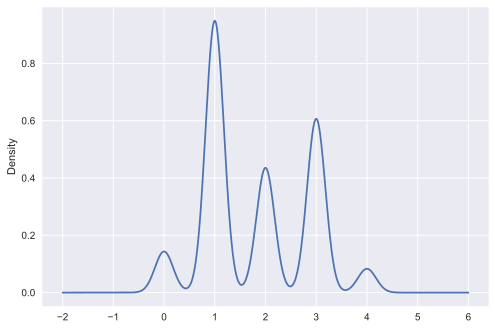

CONTROL


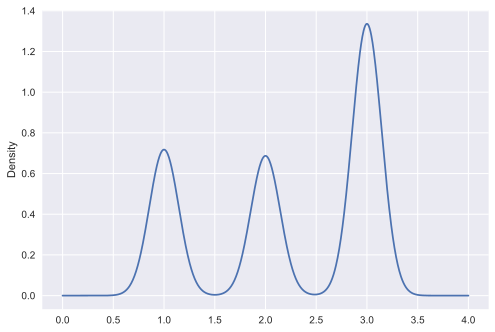

LOCALE


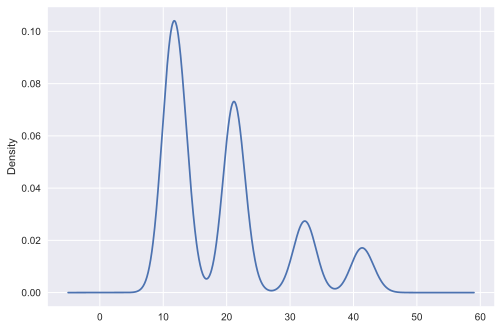

DISTANCEONLY


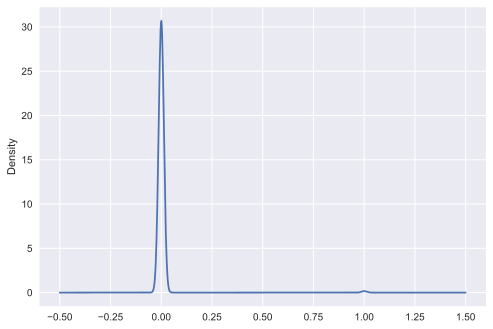

UGDS


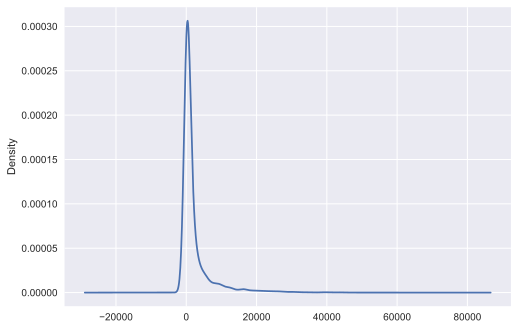

UGDS_WHITE


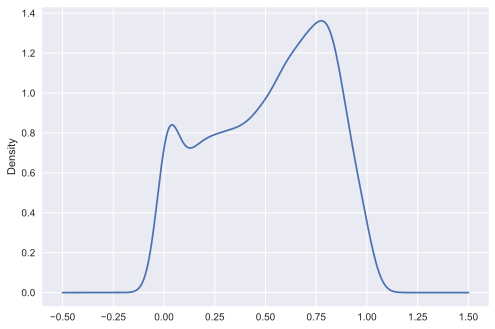

UGDS_BLACK


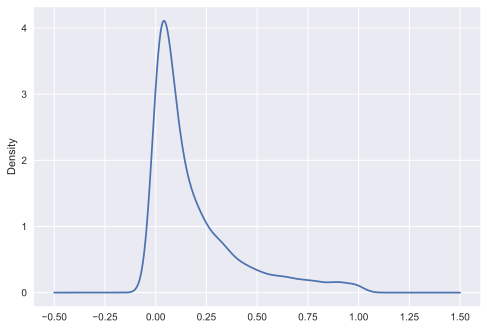

UGDS_HISP


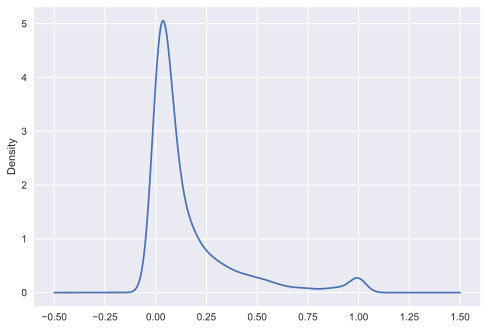

UGDS_ASIAN


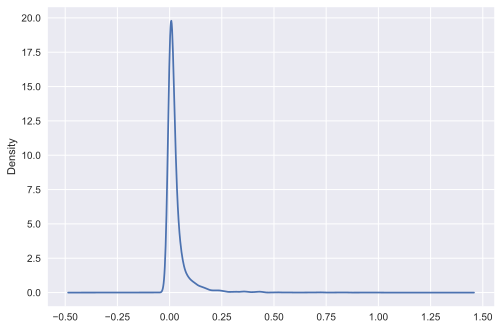

UGDS_AIAN


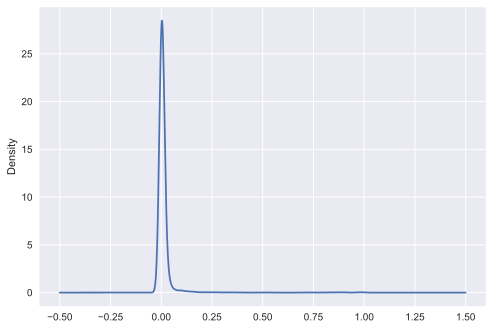

UGDS_NHPI


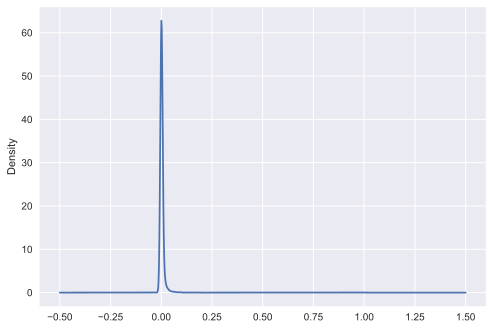

UGDS_2MOR


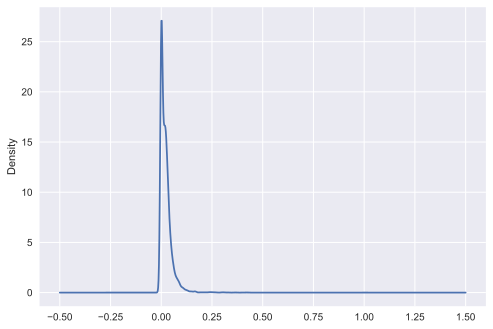

UGDS_NRA


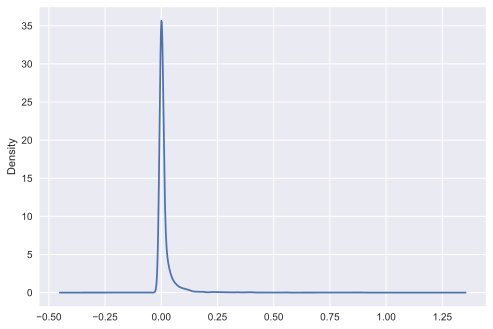

PPTUG_EF


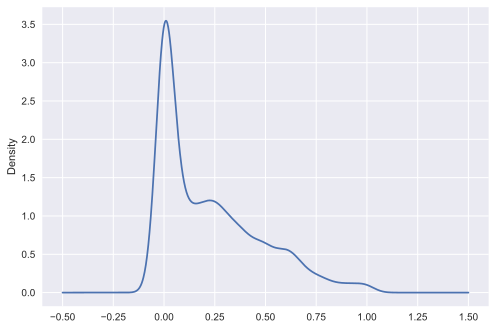

PCTPELL


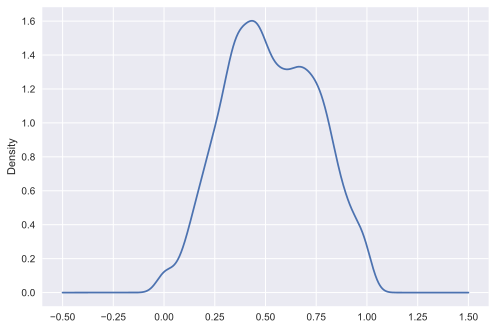

PCTFLOAN


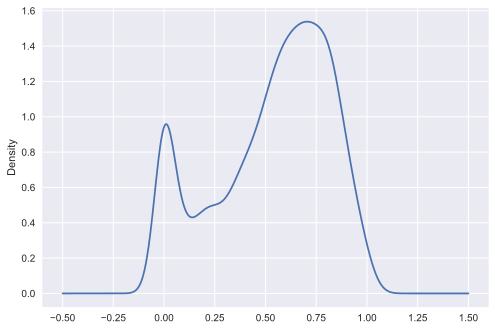

UG25abv


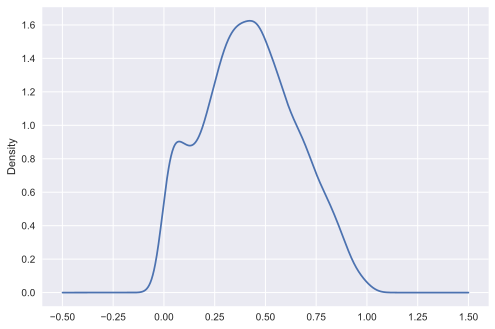

GRAD_DEBT_MDN_SUPP


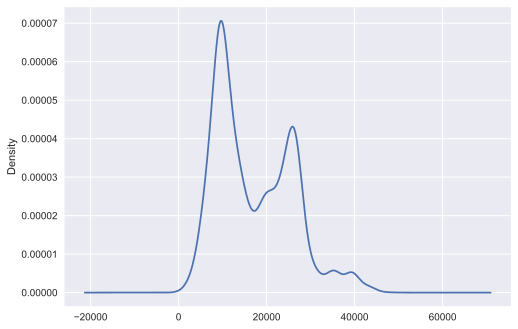

NET_COST


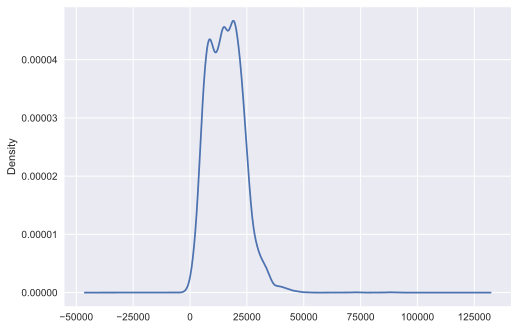

In [16]:
for i in range(len(df1.columns)):
    print (df1.columns[i])
    df1[df1.columns[i]].plot.kde()
    plt.show()

PREDDEG


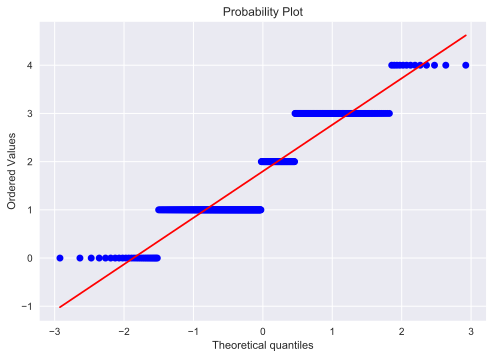

CONTROL


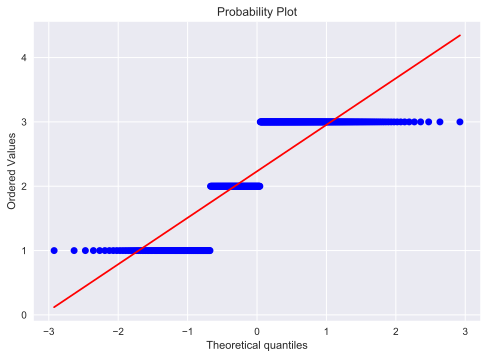

LOCALE


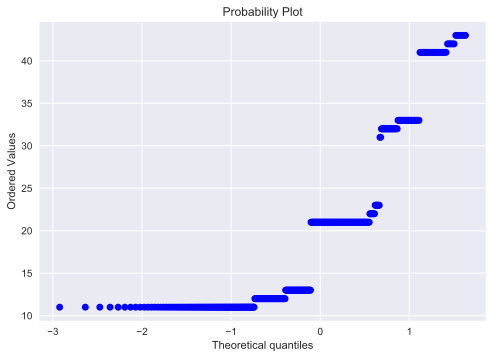

DISTANCEONLY


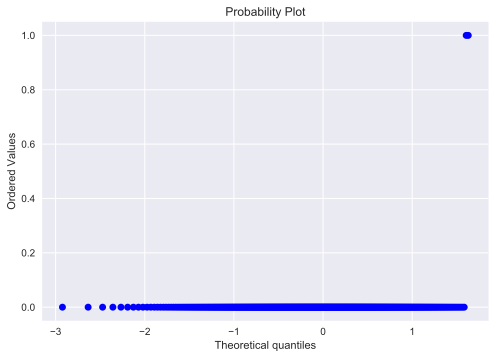

UGDS


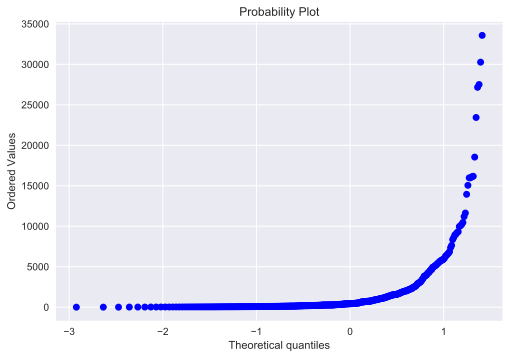

UGDS_WHITE


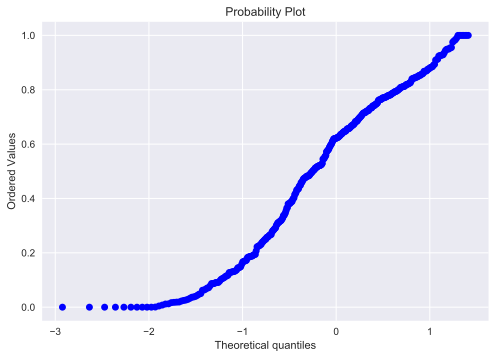

UGDS_BLACK


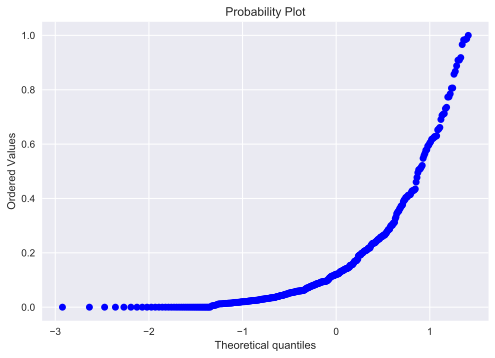

UGDS_HISP


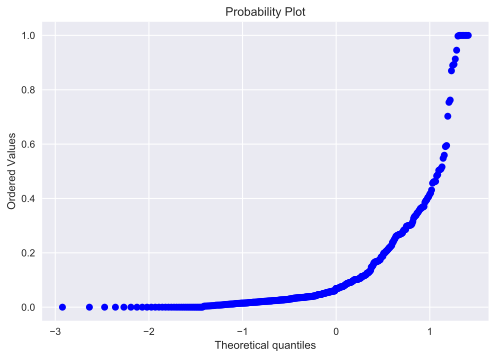

UGDS_ASIAN


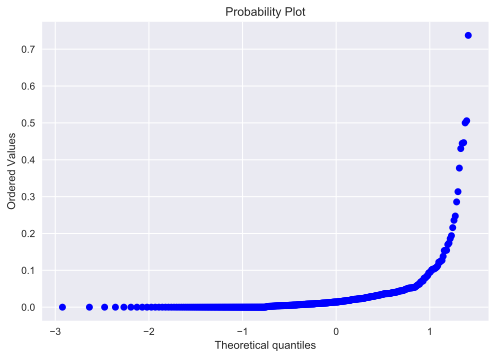

UGDS_AIAN


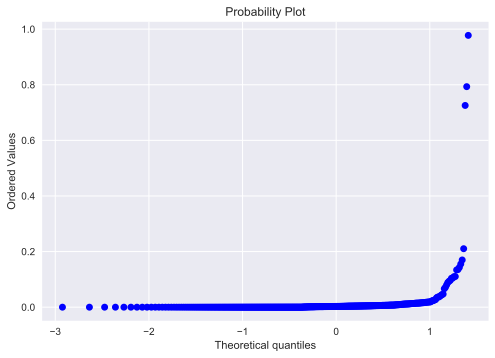

UGDS_NHPI


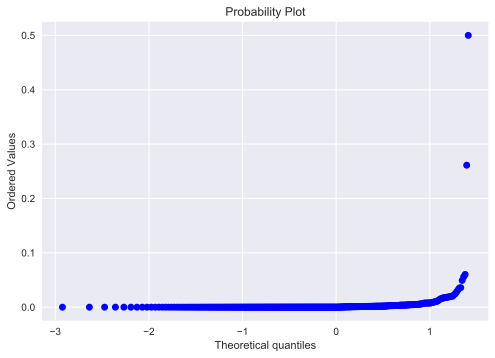

UGDS_2MOR


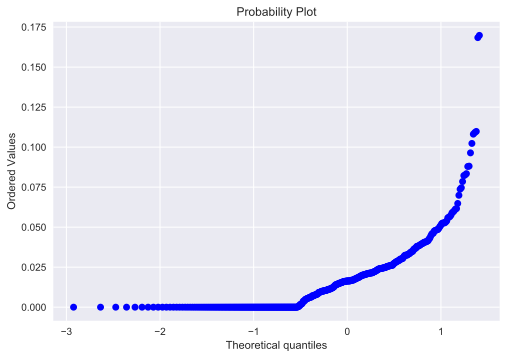

UGDS_NRA


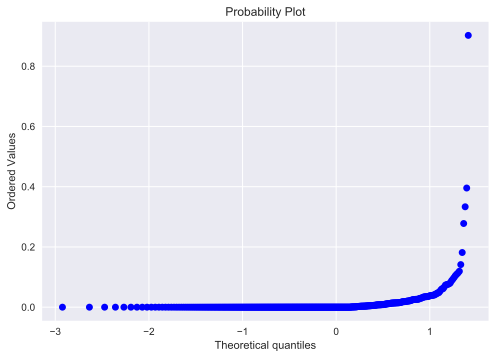

PPTUG_EF


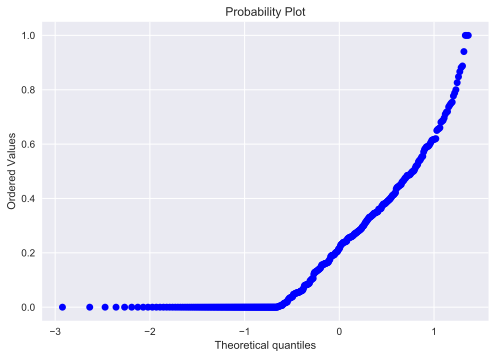

PCTPELL


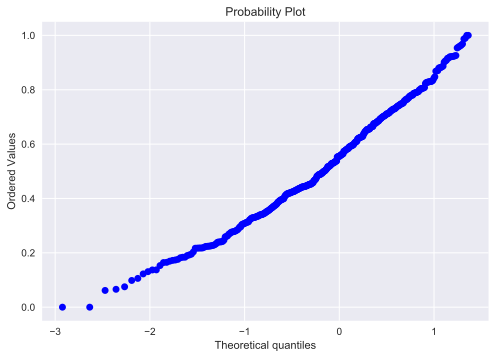

PCTFLOAN


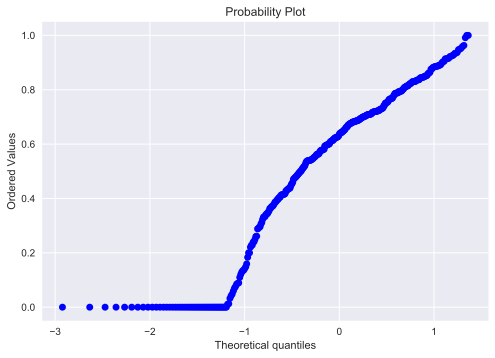

UG25abv


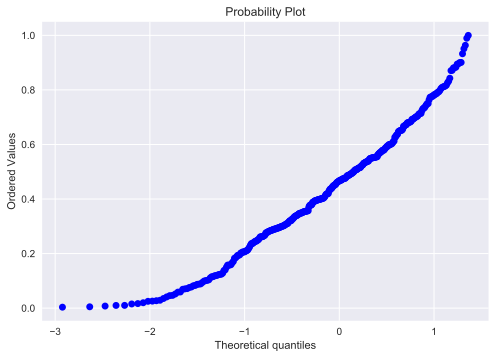

GRAD_DEBT_MDN_SUPP


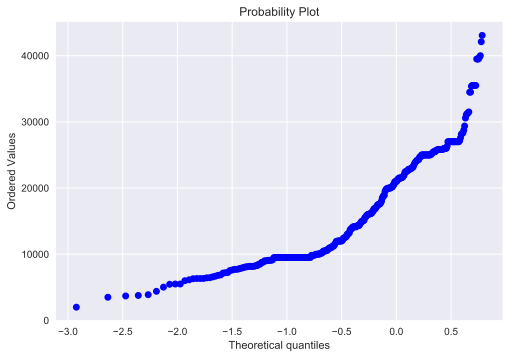

NET_COST


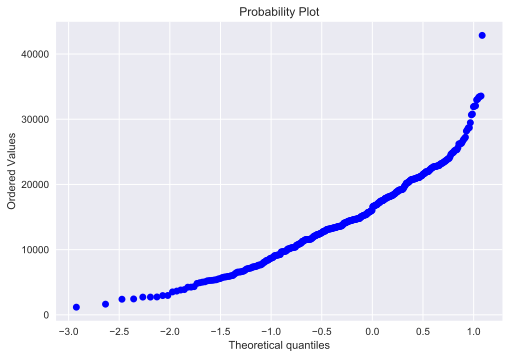

RPY_3YR_RT_SUPP


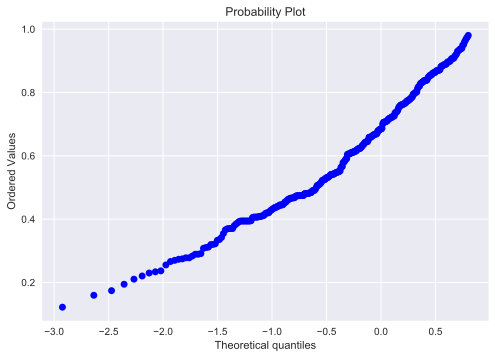

In [20]:
for i in range(len(df1.columns)):
    print (df1.columns[i])
    stats.probplot(random_subset[random_subset.columns[i]], dist="norm", plot=pylab)
    plt.show()

PREDDEG


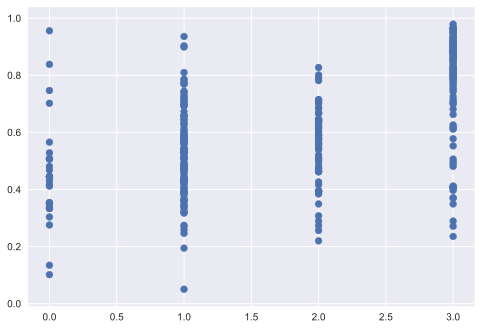

CONTROL


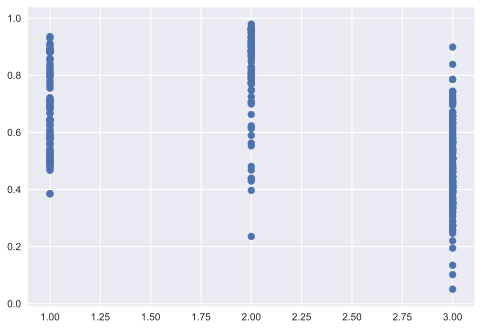

LOCALE


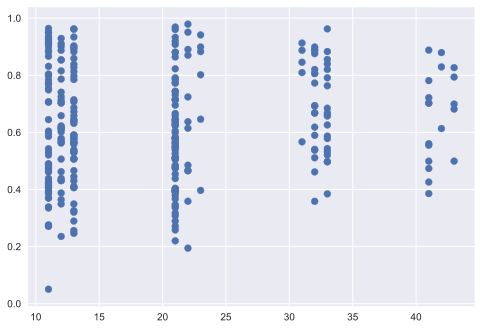

DISTANCEONLY


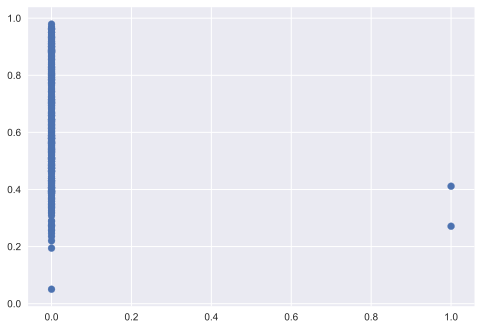

UGDS


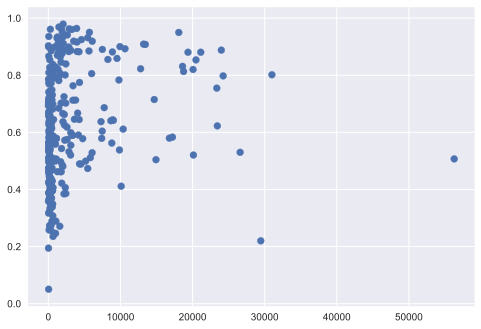

UGDS_WHITE


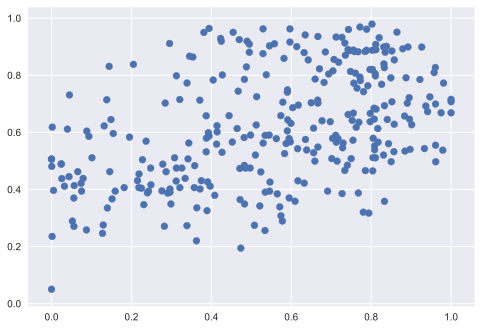

UGDS_BLACK


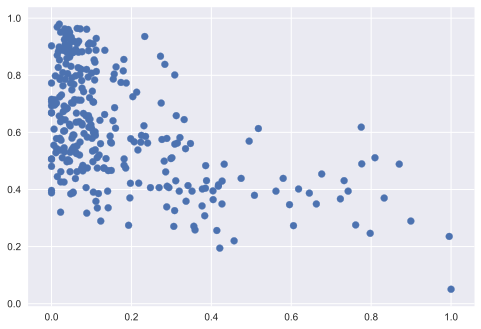

UGDS_HISP


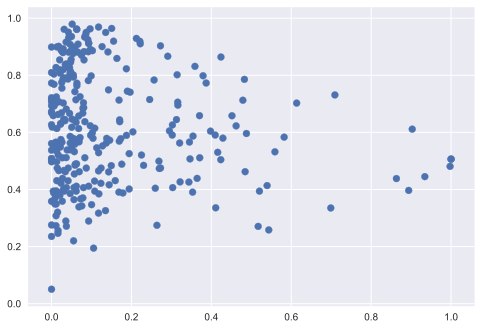

UGDS_ASIAN


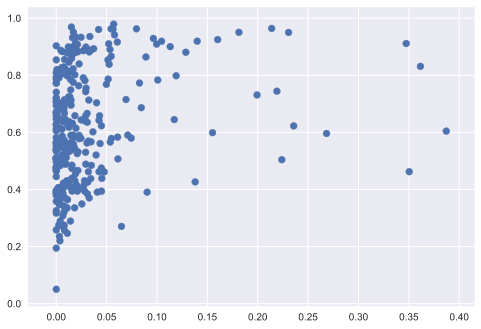

UGDS_AIAN


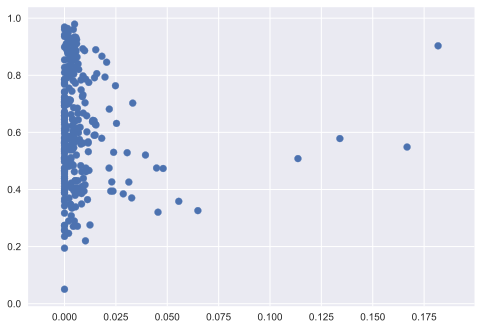

UGDS_NHPI


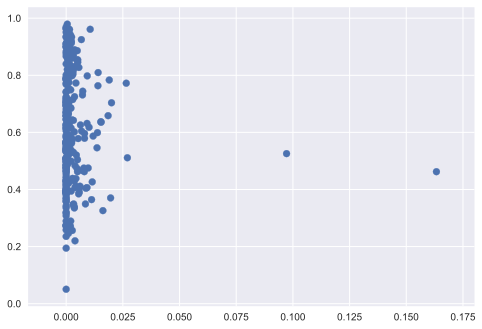

UGDS_2MOR


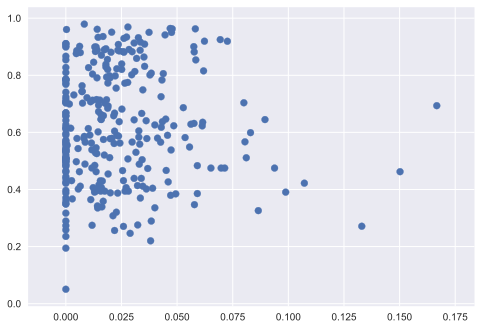

UGDS_NRA


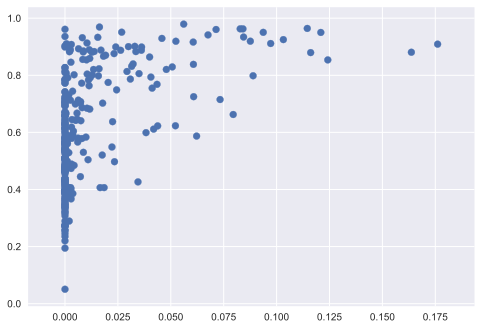

PPTUG_EF


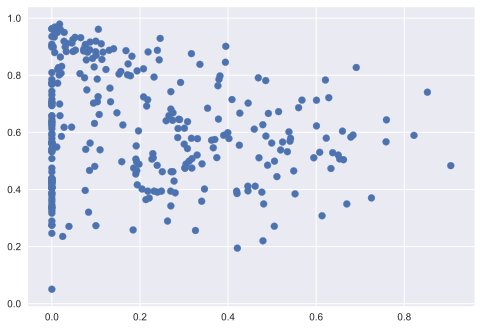

PCTPELL


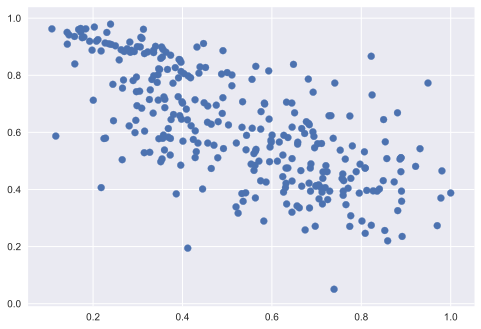

PCTFLOAN


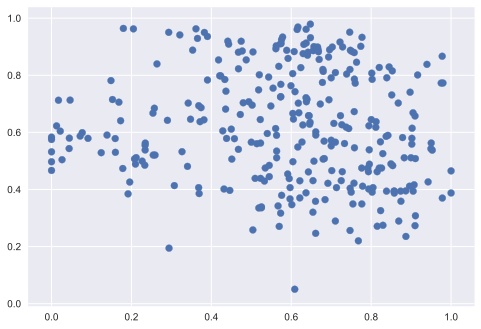

UG25abv


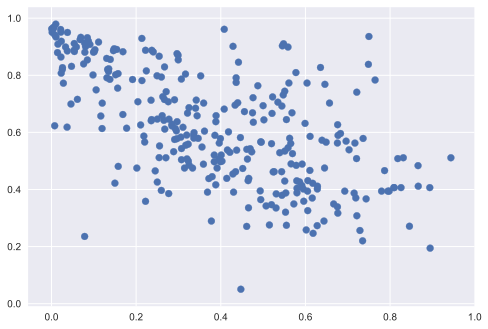

GRAD_DEBT_MDN_SUPP


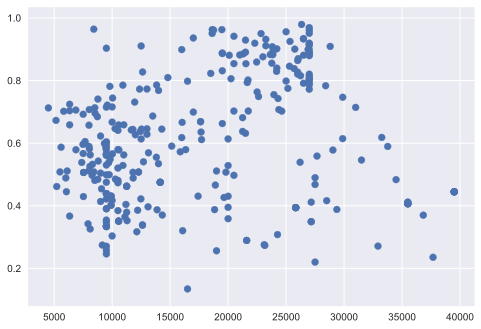

NET_COST


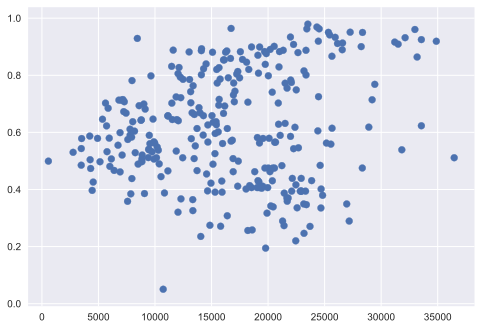

In [29]:
for i in range(len(df1.columns)-1):
    print (shuffled.columns[i])
    plt.scatter(random_subset[random_subset.columns[i]], random_subset.RPY_3YR_RT_SUPP)
    #df1[df1.columns[i]].plot.kde()
    plt.show()

In [21]:
import scipy.special as sc

In [129]:
trans_ugds = sc.boxcox(np.array(df1.UGDS),0.5)
df1.loc[:,'ugds_trans'] = pd.Series(trans_ugds,index=df1.index)

In [130]:
df1.columns[20]

'ugds_trans'

In [131]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:400]

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

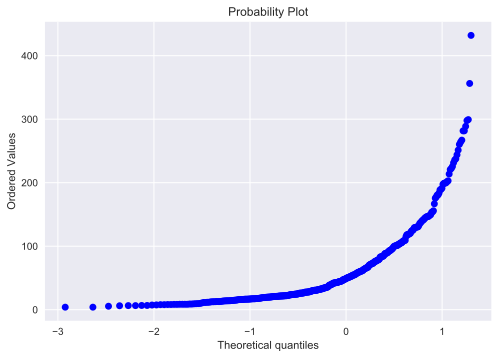

In [132]:
stats.probplot(random_subset[random_subset.columns[20]], dist="norm", plot=pylab)

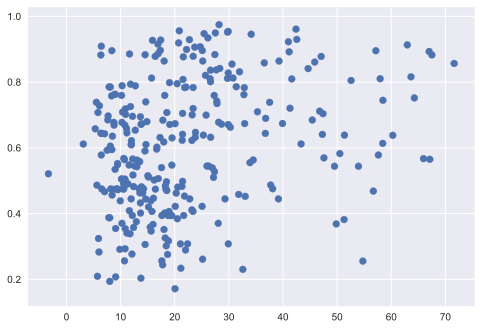

In [43]:
plt.scatter(random_subset[random_subset.columns[20]], random_subset.RPY_3YR_RT_SUPP)

In [205]:
trans_ugdswhite = sc.boxcox(np.array(df1.UGDS_WHITE),0.5)
df1.loc[:,'ugds_white_trans'] = pd.Series(trans_ugdswhite,index=df1.index)

In [206]:
trans_ugdsblack = sc.boxcox(np.array(df1.UGDS_BLACK),0.5)
df1.loc[:,'ugds_black_trans'] = pd.Series(trans_ugdsblack,index=df1.index)

In [196]:
trans_ugdsasian = sc.boxcox(np.array(df1.UGDS_ASIAN),0.5)
df1.loc[:,'ugds_asian_trans'] = pd.Series(trans_ugdsasian,index=df1.index)

In [383]:
trans_ugdshisp = sc.boxcox(np.array(df1.UGDS_HISP),0.5)
df1.loc[:,'ugds_hisp_trans'] = pd.Series(trans_ugdshisp,index=df1.index)

In [384]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

In [198]:
df1.columns[21]

'ugds_asian_trans'

((array([-3.04728891e+00, -2.77004100e+00, -2.61448416e+00, -2.50435357e+00,
         -2.41816868e+00, -2.34690362e+00, -2.28587696e+00, -2.23233600e+00,
         -2.18451984e+00, -2.14123145e+00, -2.10161876e+00, -2.06505294e+00,
         -2.03105616e+00, -1.99925653e+00, -1.96935873e+00, -1.94112416e+00,
         -1.91435724e+00, -1.88889550e+00, -1.86460252e+00, -1.84136256e+00,
         -1.81907655e+00, -1.79765902e+00, -1.77703570e+00, -1.75714162e+00,
         -1.73791961e+00, -1.71931909e+00, -1.70129507e+00, -1.68380738e+00,
         -1.66681998e+00, -1.65030038e+00, -1.63421926e+00, -1.61854997e+00,
         -1.60326829e+00, -1.58835211e+00, -1.57378117e+00, -1.55953691e+00,
         -1.54560223e+00, -1.53196137e+00, -1.51859975e+00, -1.50550387e+00,
         -1.49266122e+00, -1.48006015e+00, -1.46768980e+00, -1.45554006e+00,
         -1.44360145e+00, -1.43186513e+00, -1.42032279e+00, -1.40896663e+00,
         -1.39778932e+00, -1.38678396e+00, -1.37594405e+00, -1.36526345e+00,

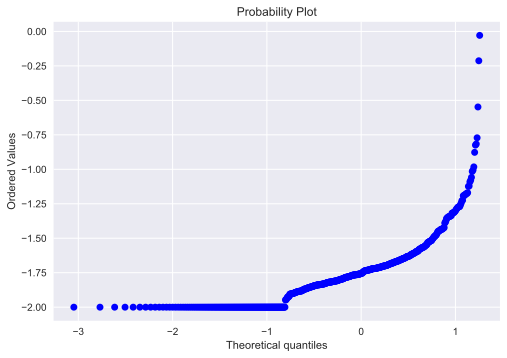

In [199]:
stats.probplot(random_subset[random_subset.columns[21]], dist="norm", plot=pylab)

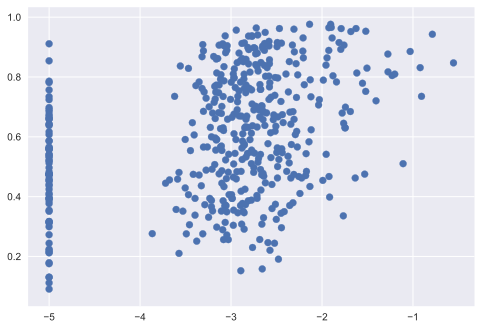

In [60]:
plt.scatter(random_subset[random_subset.columns[21]], random_subset.RPY_3YR_RT_SUPP)

In [193]:
trans_ugdsaian = sc.boxcox(np.array(df1.UGDS_AIAN),0.5)
df1.loc[:,'ugds_aian_trans'] = pd.Series(trans_ugdsaian,index=df1.index)

In [194]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

((array([-3.04728891e+00, -2.77004100e+00, -2.61448416e+00, -2.50435357e+00,
         -2.41816868e+00, -2.34690362e+00, -2.28587696e+00, -2.23233600e+00,
         -2.18451984e+00, -2.14123145e+00, -2.10161876e+00, -2.06505294e+00,
         -2.03105616e+00, -1.99925653e+00, -1.96935873e+00, -1.94112416e+00,
         -1.91435724e+00, -1.88889550e+00, -1.86460252e+00, -1.84136256e+00,
         -1.81907655e+00, -1.79765902e+00, -1.77703570e+00, -1.75714162e+00,
         -1.73791961e+00, -1.71931909e+00, -1.70129507e+00, -1.68380738e+00,
         -1.66681998e+00, -1.65030038e+00, -1.63421926e+00, -1.61854997e+00,
         -1.60326829e+00, -1.58835211e+00, -1.57378117e+00, -1.55953691e+00,
         -1.54560223e+00, -1.53196137e+00, -1.51859975e+00, -1.50550387e+00,
         -1.49266122e+00, -1.48006015e+00, -1.46768980e+00, -1.45554006e+00,
         -1.44360145e+00, -1.43186513e+00, -1.42032279e+00, -1.40896663e+00,
         -1.39778932e+00, -1.38678396e+00, -1.37594405e+00, -1.36526345e+00,

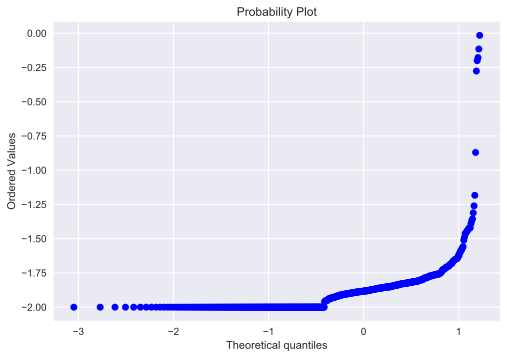

In [195]:
stats.probplot(random_subset[random_subset.columns[22]], dist="norm", plot=pylab)

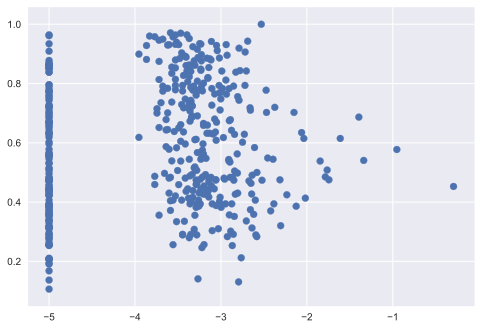

In [66]:
plt.scatter(random_subset[random_subset.columns[22]], random_subset.RPY_3YR_RT_SUPP)

In [200]:
trans_ugdsnhpi = sc.boxcox(np.array(df1.UGDS_NHPI),0.5)
df1.loc[:,'ugds_nhpi_trans'] = pd.Series(trans_ugdsnhpi,index=df1.index)

In [201]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

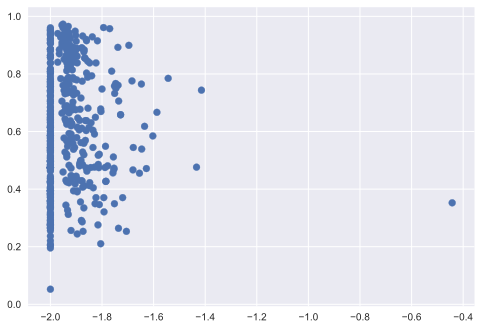

In [202]:
plt.scatter(random_subset[random_subset.columns[23]], random_subset.RPY_3YR_RT_SUPP)

In [203]:
trans_ugds2mor =  sc.boxcox(np.array(df1.UGDS_2MOR),0.5)
df1.loc[:,'ugds_2mor_trans'] = pd.Series(trans_ugds2mor,index=df1.index)

In [72]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

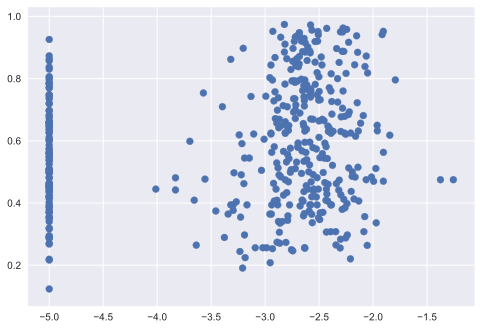

In [73]:
plt.scatter(random_subset[random_subset.columns[24]], random_subset.RPY_3YR_RT_SUPP)

In [204]:
trans_ugdsnra =  sc.boxcox(np.array(df1.UGDS_NRA),0.5)
df1.loc[:,'ugds_nra_trans'] = pd.Series(trans_ugdsnra,index=df1.index)

In [76]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

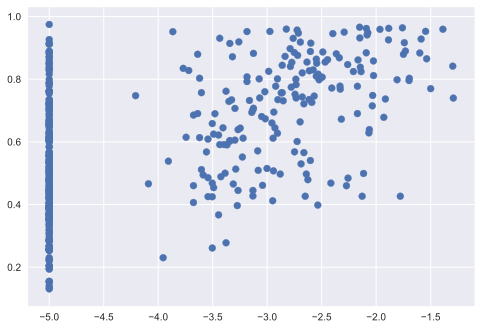

In [77]:
plt.scatter(random_subset[random_subset.columns[25]], random_subset.RPY_3YR_RT_SUPP)

In [121]:
trans_pctfloan = sc.boxcox(np.array(df1.PCTFLOAN),2)
df1.loc[:,'pctfloan_trans'] = pd.Series(trans_pctfloan,index=df1.index)

In [122]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

((array([-3.04728891e+00, -2.77004100e+00, -2.61448416e+00, -2.50435357e+00,
         -2.41816868e+00, -2.34690362e+00, -2.28587696e+00, -2.23233600e+00,
         -2.18451984e+00, -2.14123145e+00, -2.10161876e+00, -2.06505294e+00,
         -2.03105616e+00, -1.99925653e+00, -1.96935873e+00, -1.94112416e+00,
         -1.91435724e+00, -1.88889550e+00, -1.86460252e+00, -1.84136256e+00,
         -1.81907655e+00, -1.79765902e+00, -1.77703570e+00, -1.75714162e+00,
         -1.73791961e+00, -1.71931909e+00, -1.70129507e+00, -1.68380738e+00,
         -1.66681998e+00, -1.65030038e+00, -1.63421926e+00, -1.61854997e+00,
         -1.60326829e+00, -1.58835211e+00, -1.57378117e+00, -1.55953691e+00,
         -1.54560223e+00, -1.53196137e+00, -1.51859975e+00, -1.50550387e+00,
         -1.49266122e+00, -1.48006015e+00, -1.46768980e+00, -1.45554006e+00,
         -1.44360145e+00, -1.43186513e+00, -1.42032279e+00, -1.40896663e+00,
         -1.39778932e+00, -1.38678396e+00, -1.37594405e+00, -1.36526345e+00,

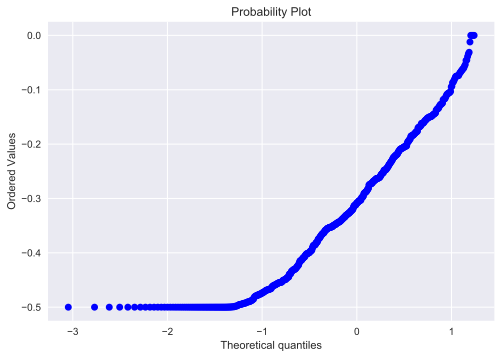

In [123]:
stats.probplot(random_subset[random_subset.columns[26]], dist="norm", plot=pylab)

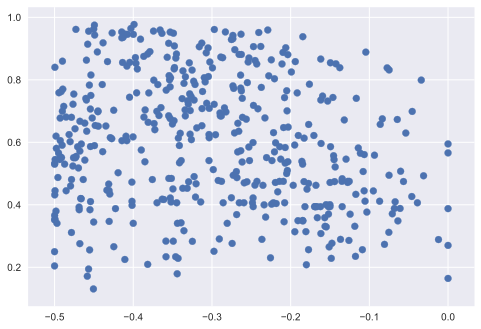

In [124]:
plt.scatter(random_subset[random_subset.columns[26]], random_subset.RPY_3YR_RT_SUPP)

In [155]:
trans_grad_debt = sc.boxcox(np.array(df1.GRAD_DEBT_MDN_SUPP),0.5)
df1.loc[:,'grad_debt_trans'] = pd.Series(trans_grad_debt,index=df1.index)

In [156]:
shuffled = df1.sample(frac=1)
random_subset = shuffled[:600]

((array([-3.04728891e+00, -2.77004100e+00, -2.61448416e+00, -2.50435357e+00,
         -2.41816868e+00, -2.34690362e+00, -2.28587696e+00, -2.23233600e+00,
         -2.18451984e+00, -2.14123145e+00, -2.10161876e+00, -2.06505294e+00,
         -2.03105616e+00, -1.99925653e+00, -1.96935873e+00, -1.94112416e+00,
         -1.91435724e+00, -1.88889550e+00, -1.86460252e+00, -1.84136256e+00,
         -1.81907655e+00, -1.79765902e+00, -1.77703570e+00, -1.75714162e+00,
         -1.73791961e+00, -1.71931909e+00, -1.70129507e+00, -1.68380738e+00,
         -1.66681998e+00, -1.65030038e+00, -1.63421926e+00, -1.61854997e+00,
         -1.60326829e+00, -1.58835211e+00, -1.57378117e+00, -1.55953691e+00,
         -1.54560223e+00, -1.53196137e+00, -1.51859975e+00, -1.50550387e+00,
         -1.49266122e+00, -1.48006015e+00, -1.46768980e+00, -1.45554006e+00,
         -1.44360145e+00, -1.43186513e+00, -1.42032279e+00, -1.40896663e+00,
         -1.39778932e+00, -1.38678396e+00, -1.37594405e+00, -1.36526345e+00,

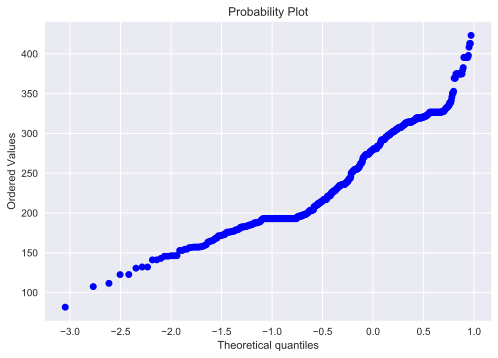

In [157]:
stats.probplot(random_subset[random_subset.columns[27]], dist="norm", plot=pylab)

In [133]:
df1.columns

Index([u'PREDDEG', u'CONTROL', u'LOCALE', u'DISTANCEONLY', u'UGDS',
       u'UGDS_WHITE', u'UGDS_BLACK', u'UGDS_HISP', u'UGDS_ASIAN', u'UGDS_AIAN',
       u'UGDS_NHPI', u'UGDS_2MOR', u'UGDS_NRA', u'PPTUG_EF', u'PCTPELL',
       u'PCTFLOAN', u'UG25abv', u'GRAD_DEBT_MDN_SUPP', u'NET_COST',
       u'RPY_3YR_RT_SUPP', u'ugds_trans', u'ugds_asian_trans',
       u'ugds_aian_trans', u'ugds_nhpi_trans', u'ugds_2mor_trans',
       u'ugds_nra_trans', u'pctfloan_trans'],
      dtype='object')

In [79]:
transformed_var=list(set(df1.columns)-{'RPY_3YR_RT_SUPP'}-{'UGDS'} - {'UGDS_ASIAN'} - {'UGDS_AIAN'} - {'UGDS_NHPI'} -{'UGDS_2MOR'} - {'UGDS_NRA'})

In [81]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(transformed_var), data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     511.3
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        11:30:37   Log-Likelihood:                 3274.8
No. Observations:                4309   AIC:                            -6510.
Df Residuals:                    4289   BIC:                            -6382.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8682      0.024     36.414      0.000       0.821       0.915
CONTROL               -0.0444      0.004    -11.647      0.000      -0.052      -0.037
PPTUG_EF              -0.0147      0.009     -1.580      0.114      -0.033       0.004
GRAD_DEBT_MDN_SUPP -3.869e-06   3.69e-07    -10.473      0.000   -4.59e-06   -3.15e-06
PREDDEG                0.0495      0.004     12.693      0.000       0.042       0.057
UG25abv               -0.1184      0.011    -10.738      0.000      -0.140      -0.097
LOCALE                -0.0007      0.000     -3.009      0.003      -0.001      -0.000
ugds_asian_trans       0.0225      0.002     10.042      0.000       0.018       0.027
ugds_trans            -0.0015      0.000     -7.076      0.000      -0.002      -0.001
ugds_nhpi_trans       -0.0111      0.002     -4.613      0.000      -0.016      -0.006
ugds_nra_trans         0.0234      0.002      9.674      0.000       0.019       0.028
PCTPELL               -0.4607      0.016    -29.419      0.000      -0.491      -0.430
PCTFLOAN               0.2835      0.014     20.978      0.000       0.257       0.310
ugds_aian_trans       -0.0210      0.002     -9.479      0.000      -0.025      -0.017
UGDS_WHITE             0.0760      0.015      5.113      0.000       0.047       0.105
UGDS_BLACK            -0.1651      0.016    -10.405      0.000      -0.196      -0.134
NET_COST            1.227e-06   3.46e-07      3.540      0.000    5.47e-07    1.91e-06
DISTANCEONLY           0.0597      0.029      2.060      0.039       0.003       0.117
ugds_2mor_trans        0.0049      0.002      2.569      0.010       0.001       0.009
UGDS_HISP              0.0182      0.017      1.076      0.282      -0.015       0.051
==============================================================================
Omnibus:                      117.582   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.390
Skew:                           0.178   Prob(JB):                     1.27e-51
Kurtosis:                       4.086   Cond. No.                     4.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
folds = 100
shuffled = df1.sample(frac=1)
print (len(shuffled))
idxs = np.arange(len(shuffled),dtype='i')/int(np.ceil(len(shuffled)/float(folds)))
#ind_folds = np.array([i%folds for i in range(len(shuffled))])
#ind_foldsp
print idxs

6243
[ 0  0  0 ... 99 99 99]


In [83]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(transformed_var), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.013347187032297259
6.973850769498386e-19


In [373]:
response='RPY_3YR_RT_SUPP'

In [85]:
def fitmodel(S,data,response):
    return smf.ols(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()
def getaic(lm):
    return lm.aic
mycriterion = getaic

In [89]:
Sfwd = set()
features = set(transformed_var)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df1, response).aic)
    after = fitmodel(Sfwd.union({f}),df1, response).aic
    before = fitmodel(Sfwd,df1, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['CONTROL', 'PREDDEG', 'UG25abv', 'LOCALE', 'ugds_asian_trans', 'ugds_trans', 'ugds_nhpi_trans', 'ugds_nra_trans', 'PCTPELL', 'PCTFLOAN', 'ugds_aian_trans', 'UGDS_WHITE', 'UGDS_BLACK', 'DISTANCEONLY', 'UGDS_HISP'])
15


In [90]:
features = set(transformed_var)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df1, response).aic)
    after = fitmodel(Sbwd-{f},df1, response).aic
    before = fitmodel(Sbwd,df1, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['CONTROL', 'PREDDEG', 'UG25abv', 'LOCALE', 'ugds_asian_trans', 'ugds_trans', 'ugds_nhpi_trans', 'ugds_nra_trans', 'PCTPELL', 'PCTFLOAN', 'ugds_aian_trans', 'UGDS_WHITE', 'UGDS_BLACK', 'DISTANCEONLY', 'UGDS_HISP'])
15


In [91]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled, response).aic < fitmodel(Sbwd,shuffled, response).aic else Sbwd
print Sboth

set(['CONTROL', 'PREDDEG', 'UG25abv', 'LOCALE', 'ugds_asian_trans', 'ugds_trans', 'ugds_nhpi_trans', 'ugds_nra_trans', 'PCTPELL', 'PCTFLOAN', 'ugds_aian_trans', 'UGDS_WHITE', 'UGDS_BLACK', 'DISTANCEONLY', 'UGDS_HISP'])


In [92]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.013708837605750224
0.0


In [94]:
#features = set(singlefeatures)
# features = set(singlefeatures).union(set(interactions))
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE(response,S,df1,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel(S.union({f}),df1,response)))
    S = S.union({f})
print S
print (len(S))

set(['UG25abv', 'LOCALE', 'ugds_asian_trans', 'ugds_nhpi_trans', 'PCTPELL', 'NET_COST', 'ugds_aian_trans', 'UGDS_WHITE', 'UGDS_HISP', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'ugds_trans', 'ugds_nra_trans', 'PCTFLOAN', 'UGDS_BLACK', 'DISTANCEONLY', 'ugds_2mor_trans'])
19


In [95]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(S), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.01334718703235664
0.0


In [97]:
for i in range(len(df1.columns)):
    print (df1.columns[i])
    print np.mean(df1[df1.columns[i]])

PREDDEG
1.79128624059
CONTROL
2.22553259651
LOCALE
19.5386567417
DISTANCEONLY
0.00541180449856
UGDS
2288.0834507
UGDS_WHITE
0.515543503521
UGDS_BLACK
0.187970088028
UGDS_HISP
0.158186214789
UGDS_ASIAN
0.0319920774648
UGDS_AIAN
0.0133702288732
UGDS_NHPI
0.00440617957746
UGDS_2MOR
0.0220174119718
UGDS_NRA
0.0148100880282
PPTUG_EF
0.225361023831
PCTPELL
0.526755037116
PCTFLOAN
0.532198921881
UG25abv
0.421099928965
GRAD_DEBT_MDN_SUPP
17061.0480392
NET_COST
15705.0364827
RPY_3YR_RT_SUPP
0.598587629593
ugds_trans
21.5760910189
ugds_asian_trans
-3.19031201745
ugds_aian_trans
-3.79167207635
ugds_nhpi_trans
-4.22894051815
ugds_2mor_trans
-3.34278089853
ugds_nra_trans
-4.08434331372


In [385]:
df1.columns

Index([u'PREDDEG', u'CONTROL', u'LOCALE', u'DISTANCEONLY', u'UGDS',
       u'UGDS_WHITE', u'UGDS_BLACK', u'UGDS_HISP', u'UGDS_ASIAN', u'UGDS_AIAN',
       u'UGDS_NHPI', u'UGDS_2MOR', u'UGDS_NRA', u'PPTUG_EF', u'PCTPELL',
       u'PCTFLOAN', u'UG25abv', u'GRAD_DEBT_MDN_SUPP', u'NET_COST',
       u'RPY_3YR_RT_SUPP', u'ugds_trans', u'ugds_asian_trans',
       u'ugds_aian_trans', u'ugds_nhpi_trans', u'ugds_2mor_trans',
       u'ugds_nra_trans', u'pctfloan_trans', u'grad_debt_trans',
       u'ugds_white_trans', u'ugds_black_trans', u'Binary_25k',
       u'ugds_hisp_trans'],
      dtype='object')

In [410]:
transformed_var1=list(set(df1.columns)-{'RPY_3YR_RT_SUPP'}- {'Binary_25k'} -
                      {'UGDS'} -{'PCTFLOAN'}-{'ugds_asian_trans'} - {'ugds_aian_trans'} - 
                      {'ugds_nhpi_trans'} -{'ugds_2mor_trans'} - {'ugds_hisp_trans'} -
                      {'ugds_nra_trans'} - {'GRAD_DEBT_MDN_SUPP'} - {'ugds_black_trans'}
                     - {'ugds_white_trans'})

In [411]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(transformed_var1), data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     494.1
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:04:36   Log-Likelihood:                 3223.9
No. Observations:                4309   AIC:                            -6408.
Df Residuals:                    4289   BIC:                            -6280.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0688      0.029     37.003      0.000       1.012       1.125
UGDS_AIAN          -0.1759      0.059     -2.995      0.003      -0.291      -0.061
CONTROL            -0.0397      0.004    -10.614      0.000      -0.047      -0.032
PPTUG_EF           -0.0265      0.009     -2.828      0.005      -0.045      -0.008
PREDDEG             0.0551      0.004     14.580      0.000       0.048       0.062
UGDS_HISP           0.0665      0.019      3.465      0.001       0.029       0.104
UG25abv            -0.1392      0.011    -12.557      0.000      -0.161      -0.117
LOCALE             -0.0006      0.000     -2.506      0.012      -0.001      -0.000
ugds_trans         -0.0002   3.76e-05     -6.575      0.000      -0.000      -0.000
UGDS_ASIAN          0.5822      0.042     13.916      0.000       0.500       0.664
PCTPELL            -0.4796      0.016    -30.765      0.000      -0.510      -0.449
pctfloan_trans      0.4844      0.024     20.544      0.000       0.438       0.531
NET_COST         1.626e-06   3.51e-07      4.636      0.000    9.38e-07    2.31e-06
UGDS_2MOR           0.0719      0.069      1.043      0.297      -0.063       0.207
UGDS_NHPI          -0.3602      0.114     -3.150      0.002      -0.584      -0.136
UGDS_BLACK         -0.0894      0.018     -4.843      0.000      -0.126      -0.053
UGDS_WHITE          0.1524      0.017      8.768      0.000       0.118       0.186
DISTANCEONLY        0.0522      0.029      1.778      0.075      -0.005       0.110
grad_debt_trans    -0.0005   4.84e-05     -9.557      0.000      -0.001      -0.000
UGDS_NRA            0.3584      0.066      5.455      0.000       0.230       0.487
==============================================================================
Omnibus:                       75.247   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.581
Skew:                           0.034   Prob(JB):                     3.30e-33
Kurtosis:                       3.910   Cond. No.                     1.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [412]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(transformed_var1), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.008756514577018154
0.0


In [436]:
transformed_var2 =list(set(df1.columns)-{'RPY_3YR_RT_SUPP'}- {'Binary_25k'} - {'UGDS_WHITE'} - {'UGDS_BLACK'} 
                     - {'UGDS_ASIAN'} - {'UGDS_AIAN'} - {'UGDS_NHPI'}
                     -{'UGDS_2MOR'} - {'UGDS_NRA'} - {'UGDS_HISP'} -{'UGDS'} - {'PCTFLOAN'}
                    - {'GRAD_DEBT_MDN_SUPP'})

In [437]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(transformed_var2), data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     506.7
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:18:35   Log-Likelihood:                 3261.1
No. Observations:                4309   AIC:                            -6482.
Df Residuals:                    4289   BIC:                            -6355.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1141      0.058     19.238      0.000       1.001       1.228
CONTROL             -0.0394      0.004    -10.660      0.000      -0.047      -0.032
grad_debt_trans     -0.0005   4.81e-05     -9.720      0.000      -0.001      -0.000
PPTUG_EF            -0.0297      0.009     -3.183      0.001      -0.048      -0.011
PREDDEG              0.0515      0.004     13.539      0.000       0.044       0.059
ugds_hisp_trans  -2.424e-05      0.006     -0.004      0.997      -0.012       0.012
UG25abv             -0.1194      0.011    -10.749      0.000      -0.141      -0.098
LOCALE              -0.0004      0.000     -1.869      0.062      -0.001    2.07e-05
ugds_asian_trans     0.1322      0.010     13.152      0.000       0.112       0.152
ugds_trans          -0.0003   3.78e-05     -7.466      0.000      -0.000      -0.000
ugds_nhpi_trans     -0.1126      0.020     -5.756      0.000      -0.151      -0.074
ugds_nra_trans       0.0993      0.013      7.754      0.000       0.074       0.124
PCTPELL             -0.4476      0.016    -28.537      0.000      -0.478      -0.417
pctfloan_trans       0.4691      0.023     20.097      0.000       0.423       0.515
NET_COST          1.159e-06   3.48e-07      3.329      0.001    4.76e-07    1.84e-06
ugds_aian_trans     -0.1036      0.013     -7.906      0.000      -0.129      -0.078
ugds_black_trans    -0.0820      0.006    -14.022      0.000      -0.093      -0.071
ugds_white_trans     0.0529      0.007      8.111      0.000       0.040       0.066
DISTANCEONLY         0.0597      0.029      2.052      0.040       0.003       0.117
ugds_2mor_trans      0.0180      0.011      1.693      0.091      -0.003       0.039
==============================================================================
Omnibus:                       79.166   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.081
Skew:                           0.088   Prob(JB):                     9.46e-34
Kurtosis:                       3.903   Cond. No.                     6.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [439]:
shuffled = df1.sample(frac=1)

In [440]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(transformed_var2), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.014537764648859674
6.973850769498386e-19


In [374]:
Sfwd = set()
features = set(transformed_var1)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df1, response).aic)
    after = fitmodel(Sfwd.union({f}),df1, response).aic
    before = fitmodel(Sfwd,df1, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['UGDS_AIAN', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'PCTFLOAN', 'UGDS_NHPI', 'PREDDEG', 'UGDS_HISP', 'CONTROL', 'ugds_black_trans', 'ugds_trans', 'UGDS_WHITE', 'UGDS_BLACK', 'ugds_white_trans', 'DISTANCEONLY', 'UGDS_NRA'])
17


In [375]:
features = set(transformed_var1)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df1, response).aic)
    after = fitmodel(Sbwd-{f},df1, response).aic
    before = fitmodel(Sbwd,df1, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

set(['UGDS_AIAN', 'CONTROL', 'PPTUG_EF', 'GRAD_DEBT_MDN_SUPP', 'PREDDEG', 'UG25abv', 'LOCALE', 'ugds_trans', 'UGDS_ASIAN', 'PCTPELL', 'Binary_25k', 'PCTFLOAN', 'UGDS_2MOR', 'UGDS_NHPI', 'UGDS_BLACK', 'UGDS_WHITE', 'UGDS_NRA', 'ugds_white_trans', 'UGDS_HISP'])
19


In [376]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled, response).aic < fitmodel(Sbwd,shuffled, response).aic else Sbwd
print Sboth

set(['UGDS_AIAN', 'UG25abv', 'LOCALE', 'UGDS_ASIAN', 'PCTPELL', 'PCTFLOAN', 'UGDS_NHPI', 'PREDDEG', 'UGDS_HISP', 'CONTROL', 'ugds_black_trans', 'ugds_trans', 'UGDS_WHITE', 'UGDS_BLACK', 'ugds_white_trans', 'DISTANCEONLY', 'UGDS_NRA'])


In [377]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

0.008265707887545434
1.7434626923745965e-19


In [369]:
interactions_trans = ['%s:%s'%v for v in itertools.combinations(transformed_var1,2)]

In [378]:
features = set(interactions_trans).union(set(transformed_var1))

In [372]:
 smf.ols('RPY_3YR_RT_SUPP~ ' + '+'.join(features), data=df1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RPY_3YR_RT_SUPP   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     67.64
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:31:55   Log-Likelihood:                 3916.3
No. Observations:                3853   AIC:                            -7347.
Df Residuals:                    3610   BIC:                            -5826.
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1077      0.847      0.127      0.899      -1.553       1.768
PCTFLOAN:GRAD_DEBT_MDN_SUPP          4.694e-06   2.65e-06      1.770      0.077   -5.04e-07    9.89e-06
NET_COST:PPTUG_EF                    2.588e-06   1.92e-06      1.349      0.178   -1.17e-06    6.35e-06
PCTPELL:NET_COST                     1.738e-06   2.68e-06      0.649      0.516   -3.51e-06    6.99e-06
LOCALE:UGDS_NRA                         0.0056      0.009      0.603      0.546      -0.013       0.024
PREDDEG:Binary_25k                     -0.0303      0.009     -3.229      0.001      -0.049      -0.012
GRAD_DEBT_MDN_SUPP:DISTANCEONLY      -1.36e-05   1.07e-05     -1.270      0.204   -3.46e-05     7.4e-06
ugds_trans:UGDS_BLACK                   0.0016      0.001      1.541      0.123      -0.000       0.004
UGDS_NHPI:GRAD_DEBT_MDN_SUPP        -1.758e-05    3.9e-05     -0.451      0.652    -9.4e-05    5.88e-05
UG25abv:PCTPELL                        -0.3483      0.097     -3.580      0.000      -0.539      -0.158
PCTFLOAN:UGDS_ASIAN                    -0.4772      0.319     -1.498      0.134      -1.102       0.147
PCTFLOAN:ugds_white_trans               0.1783      0.151      1.180      0.238      -0.118       0.475
CONTROL:PREDDEG                        -0.0032      0.008     -0.383      0.702      -0.019       0.013
LOCALE:NET_COST                      5.048e-08   4.41e-08      1.146      0.252   -3.59e-08    1.37e-07
Binary_25k:ugds_black_trans            -0.0193      0.049     -0.391      0.695      -0.116       0.077
UGDS_AIAN:ugds_white_trans             -2.5502      1.232     -2.070      0.039      -4.966      -0.135
Binary_25k:UGDS_ASIAN                   0.0875      0.143      0.612      0.541      -0.193       0.368
UGDS_HISP:ugds_white_trans             -0.4998      0.205     -2.434      0.015      -0.902      -0.097
CONTROL:ugds_trans                      0.0002   8.79e-05      1.972      0.049    9.64e-07       0.000
PCTPELL:ugds_white_trans               -0.0801      0.182     -0.439      0.660      -0.437       0.277
PCTFLOAN:NET_COST                   -6.317e-07   2.33e-06     -0.271      0.786    -5.2e-06    3.93e-06
UG25abv:LOCALE                          0.0032      0.001      2.428      0.015       0.001       0.006
UGDS_AIAN:Binary_25k                   -0.2200      0.307     -0.716      0.474      -0.823       0.383
UGDS_ASIAN:PPTUG_EF                    -0.7460      0.268     -2.786      0.005      -1.271      -0.221
NET_COST:UGDS_BLACK                 -1.321e-08   7.41e-06     -0.002      0.999   -1.45e-05    1.45e-05
CONTROL:UGDS_2MOR                       0.3632      0.168      2.163      0.031       0.034       0.692
PCTFLOAN:UGDS_2MOR                      0.6820      0.629      1.08

In [379]:
Sfwd = set()
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df1, response).aic)
    after = fitmodel(Sfwd.union({f}),df1, response).aic
    before = fitmodel(Sfwd,df1, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

set(['UGDS_AIAN', 'UG25abv', 'UGDS_NRA:UGDS_HISP', 'UGDS_AIAN:PPTUG_EF', 'ugds_trans:UGDS_WHITE', 'UG25abv:PCTPELL', 'PCTFLOAN:UGDS_ASIAN', 'PCTFLOAN:ugds_white_trans', 'PCTPELL:UGDS_WHITE', 'UG25abv:PCTFLOAN', 'PREDDEG:PCTPELL', 'UGDS_AIAN:LOCALE', 'UGDS_HISP:ugds_white_trans', 'CONTROL:ugds_trans', 'PPTUG_EF:ugds_trans', 'PCTPELL:ugds_white_trans', 'UGDS_NHPI:UGDS_HISP', 'UG25abv:LOCALE', 'UGDS_AIAN:Binary_25k', 'UGDS_ASIAN:PPTUG_EF', 'Binary_25k', 'UGDS_AIAN:UGDS_NRA', 'CONTROL:UGDS_2MOR', 'PREDDEG:Binary_25k', 'ugds_black_trans:UGDS_WHITE', 'CONTROL:UGDS_ASIAN', 'PCTFLOAN:CONTROL', 'UG25abv:UGDS_BLACK', 'Binary_25k:UGDS_HISP', 'PCTPELL:ugds_trans', 'UGDS_WHITE:ugds_white_trans', 'PREDDEG:ugds_trans', 'PCTPELL', 'PPTUG_EF:ugds_black_trans', 'ugds_black_trans:ugds_white_trans', 'PCTFLOAN:ugds_trans', 'PREDDEG:PPTUG_EF', 'LOCALE:ugds_trans', 'Binary_25k:UGDS_NHPI', 'UGDS_ASIAN:UGDS_WHITE', 'UGDS_AIAN:UGDS_NHPI', 'UGDS_AIAN:UGDS_2MOR', 'CONTROL:PPTUG_EF', 'PREDDEG:UGDS_BLACK', 'CONTROL

In [380]:
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df1, response).aic)
    after = fitmodel(Sbwd-{f},df1, response).aic
    before = fitmodel(Sbwd,df1, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

KeyboardInterrupt: 

In [ ]:
Sboth = Sfwd if fitmodel(Sfwd,shuffled, response).aic < fitmodel(Sbwd,shuffled, response).aic else Sbwd
print Sboth

In [ ]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.ols('RPY_3YR_RT_SUPP ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['RPY_3YR_RT_SUPP'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

In [307]:
df1.loc[:,'Binary_25k'] = pd.Series(df.Binary_25k,index=df1.index)

In [308]:
df1.columns

Index([u'PREDDEG', u'CONTROL', u'LOCALE', u'DISTANCEONLY', u'UGDS',
       u'UGDS_WHITE', u'UGDS_BLACK', u'UGDS_HISP', u'UGDS_ASIAN', u'UGDS_AIAN',
       u'UGDS_NHPI', u'UGDS_2MOR', u'UGDS_NRA', u'PPTUG_EF', u'PCTPELL',
       u'PCTFLOAN', u'UG25abv', u'GRAD_DEBT_MDN_SUPP', u'NET_COST',
       u'RPY_3YR_RT_SUPP', u'ugds_trans', u'ugds_asian_trans',
       u'ugds_aian_trans', u'ugds_nhpi_trans', u'ugds_2mor_trans',
       u'ugds_nra_trans', u'pctfloan_trans', u'grad_debt_trans',
       u'ugds_white_trans', u'ugds_black_trans', u'Binary_25k'],
      dtype='object')

In [323]:
transformed_var3=list(set(df1.columns)-{'RPY_3YR_RT_SUPP'}- {'Binary_25k'} - 
                      {'trans_ugds'} -{'PCT_FLOAN'}-{'ugds_asian_trans'} - {'ugds_aian_trans'} - 
                      {'ugds_nhpi_trans'} -{'ugds_2mor_trans'} - {'ugds_nra_trans'} - {'GRAD_DEBT_MDN_SUPP'} - 
                     {'ugds_black_trans'} - {'ugds_white_trans'})

In [340]:
transformed_var4 =list(set(df1.columns)-{'RPY_3YR_RT_SUPP'}- {'Binary_25k'} -{'UGDS_WHITE'} - {'UGDS_BLACK'} 
                     - {'UGDS_ASIAN'} - {'UGDS_AIAN'} - {'UGDS_NHPI'}
                     -{'UGDS_2MOR'} - {'UGDS_NRA'} - {'ugds_trans'} - {'pctfloan_trans'}
                    - {'GRAD_DEBT_MDN_SUPP'})

In [341]:
 smf.logit('Binary_25k~ ' + '+'.join(transformed_var4), data=df1).fit().summary()

Optimization terminated successfully.
         Current function value: 0.338967
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3876
Method:                           MLE   Df Model:                           19
Date:                Tue, 24 Apr 2018   Pseudo R-squ.:                  0.4499
Time:                        14:57:49   Log-Likelihood:                -1320.6
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9658      1.637     -0.590      0.555      -4.175       2.244
CONTROL             -1.0808      0.106    -10.222      0.000      -1.288      -0.874
grad_debt_trans      0.0041      0.002      2.670      0.008       0.001       0.007
PPTUG_EF            -1.9788      0.281     -7.047      0.000      -2.529      -1.428
PREDDEG              0.7858      0.118      6.668      0.000       0.555       1.017
UG25abv              4.4918      0.346     12.999      0.000       3.814       5.169
LOCALE               0.0023      0.006      0.388      0.698      -0.009       0.014
ugds_asian_trans     2.0695      0.311      6.662      0.000       1.461       2.678
ugds_nhpi_trans      1.3652      0.558      2.444      0.015       0.271       2.460
ugds_nra_trans      -0.0435      0.327     -0.133      0.894      -0.685       0.598
PCTPELL             -9.6794      0.571    -16.957      0.000     -10.798      -8.561
NET_COST          3.094e-05   1.08e-05      2.858      0.004    9.72e-06    5.21e-05
ugds_aian_trans     -2.4032      0.521     -4.614      0.000      -3.424      -1.382
ugds_black_trans     0.2192      0.203      1.081      0.280      -0.178       0.617
UGDS              2.793e-05   1.04e-05      2.698      0.007    7.64e-06    4.82e-05
DISTANCEONLY         0.5004      0.759      0.659      0.510      -0.987       1.988
PCTFLOAN             5.8861      0.456     12.908      0.000       4.992       6.780
ugds_white_trans     0.3466      0.231      1.500      0.134      -0.106       0.799
ugds_2mor_trans     -0.3623      0.334     -1.086      0.278      -1.016       0.292
UGDS_HISP            0.9797      0.517      1.894      0.058      -0.034       1.994
====================================================================================
"""

In [338]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(transformed_var4), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
  

Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338804
  

In [342]:
response = 'Binary_25k'

In [343]:
Sfwd = set()
features = set(transformed_var4)
#.union(set(interactions))
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel_logit(Sfwd.union({f}),df1, response).aic)
    after = fitmodel_logit(Sfwd.union({f}),df1, response).aic
    before = fitmodel_logit(Sfwd,df1, response).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd
print len(Sfwd)

Optimization terminated successfully.
         Current function value: 0.595538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.533369
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577102
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603851
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.532773
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507859
  

Optimization terminated successfully.
         Current function value: 0.395034
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394064
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394654
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395012
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.394149
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382178
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.395087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.372756
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.382170
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.376741
  

Optimization terminated successfully.
         Current function value: 0.340370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340359
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340358
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340367
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340298
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340283
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340144
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340384
  

In [344]:
features = set(transformed_var4)
#union(set(interactions))
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel_logit(Sbwd-{f},df1, response).aic)
    after = fitmodel_logit(Sbwd-{f},df1, response).aic
    before = fitmodel_logit(Sbwd,df1, response).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd
print len(Sbwd)

Optimization terminated successfully.
         Current function value: 0.321660
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.363663
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.338987
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.344846
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339724
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.384457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.347290
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.342020
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339119
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362497
  

Optimization terminated successfully.
         Current function value: 0.342344
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345619
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340175
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363405
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339530
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339370
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339193
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.321821
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353900
  

In [345]:
Sboth = Sfwd if fitmodel_logit(Sfwd,shuffled, response).aic < fitmodel_logit(Sbwd,shuffled, response).aic else Sbwd
print Sboth

Optimization terminated successfully.
         Current function value: 0.339743
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339743
         Iterations 7
set(['grad_debt_trans', 'CONTROL', 'PPTUG_EF', 'PREDDEG', 'UG25abv', 'ugds_asian_trans', 'ugds_nhpi_trans', 'PCTPELL', 'NET_COST', 'ugds_aian_trans', 'UGDS', 'PCTFLOAN'])


In [346]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(Sboth), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
  

Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.340082
  

In [347]:
S = set()
Ss  = [None for i in range(len(features)+1)]
CVs = np.zeros(len(features)+1)
SEs = np.zeros(len(features)+1)
while True:
    Ss[len(S)] = S
    CVs[len(S)],SEs[len(S)] = CV_MSE_logit(response,S,df1,idxs)
    if len(S)>=len(features):
        break
    f = max(features - S, key = lambda f: mycriterion(fitmodel_logit(S.union({f}),df1,response)))
    S = S.union({f})
print S
print (len(S))

Optimization terminated successfully.
         Current function value: 0.615522
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615561
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616271
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614862
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.614740
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615197
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615760
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615532
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615615
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615856
  

Optimization terminated successfully.
         Current function value: 0.616817
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616364
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615280
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615590
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595538
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.533369
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.599771
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.508251
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.582237
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.610106
  

Optimization terminated successfully.
         Current function value: 0.595324
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595459
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594363
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594926
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596159
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595272
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595745
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596947
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595447
  

Optimization terminated successfully.
         Current function value: 0.586623
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586625
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.587152
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586200
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586142
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586907
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585748
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.585000
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586398
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.586617
  

Optimization terminated successfully.
         Current function value: 0.578515
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579246
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579299
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579738
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579948
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577890
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578089
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577870
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578297
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578126
  

Optimization terminated successfully.
         Current function value: 0.577911
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579614
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579455
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578327
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579515
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.579618
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.578128
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577912
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580602
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.580039
  

Optimization terminated successfully.
         Current function value: 0.574685
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573399
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573414
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571581
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573336
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573218
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573790
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.574191
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573136
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.573060
  

Optimization terminated successfully.
         Current function value: 0.570105
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571423
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570960
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570557
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570826
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571795
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.571511
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570975
  

Optimization terminated successfully.
         Current function value: 0.567916
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.551308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.568254
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568544
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568493
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567063
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567265
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567497
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568334
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567956
  

Optimization terminated successfully.
         Current function value: 0.568026
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568091
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567518
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567371
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.566932
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568312
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568347
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567583
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568480
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568584
  

Optimization terminated successfully.
         Current function value: 0.563851
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562563
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562518
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.563667
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562755
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564057
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561927
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564056
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562910
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.562996
  

Optimization terminated successfully.
         Current function value: 0.553480
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552810
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551972
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552589
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551802
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553240
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551829
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553204
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552195
  

Optimization terminated successfully.
         Current function value: 0.513364
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494618
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441082
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537211
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497174
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.524753
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547057
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547417
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547900
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546314
  

Optimization terminated successfully.
         Current function value: 0.546576
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546736
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546844
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546632
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545939
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546756
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547648
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547066
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545864
  

Optimization terminated successfully.
         Current function value: 0.536878
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538091
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536748
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537252
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536232
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538211
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536026
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.538438
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537399
  

Optimization terminated successfully.
         Current function value: 0.523954
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522920
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525866
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524206
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524919
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523797
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523614
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524857
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523421
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525638
  

Optimization terminated successfully.
         Current function value: 0.506500
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504648
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504182
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.505630
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506589
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506292
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506026
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504020
  

Optimization terminated successfully.
         Current function value: 0.506261
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506372
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504472
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504002
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504297
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506075
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.504762
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506327
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.506437
  

Optimization terminated successfully.
         Current function value: 0.499079
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498062
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496233
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498166
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496829
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498237
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.499140
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498455
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.498381
  

Optimization terminated successfully.
         Current function value: 0.477225
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477210
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.478017
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477293
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477116
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.476813
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477078
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.474807
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477137
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.477018
  

Optimization terminated successfully.
         Current function value: 0.449834
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450514
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450836
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.451200
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452071
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450856
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.448990
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450753
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452310
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452137
  

Optimization terminated successfully.
         Current function value: 0.451379
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.387871
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.348736
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.397425
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.379135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398051
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396966
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397810
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396785
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.396042
  

Optimization terminated successfully.
         Current function value: 0.398111
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.399162
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397081
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397773
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397035
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398048
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398297
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398845
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.398145
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.397087
  

Optimization terminated successfully.
         Current function value: 0.350582
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352575
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352783
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.354378
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351012
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.352949
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.350325
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.353247
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351369
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.351300
  

Optimization terminated successfully.
         Current function value: 0.362423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362808
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363740
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.361605
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363196
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362738
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363308
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.360004
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.362467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.363117
  

Optimization terminated successfully.
         Current function value: 0.338644
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339247
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338943
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339403
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.335581
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339178
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.338810
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.339296
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.336162
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337097
  

In [348]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(S), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
  

Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.337782
  

In [361]:
transformed_var4

['CONTROL',
 'grad_debt_trans',
 'PPTUG_EF',
 'PREDDEG',
 'UG25abv',
 'LOCALE',
 'ugds_asian_trans',
 'ugds_nhpi_trans',
 'ugds_nra_trans',
 'PCTPELL',
 'NET_COST',
 'ugds_aian_trans',
 'ugds_black_trans',
 'UGDS',
 'DISTANCEONLY',
 'PCTFLOAN',
 'ugds_white_trans',
 'ugds_2mor_trans',
 'UGDS_HISP']

In [362]:
keep = []
race = []
for i in range(len(transformed_var4)):
    if 'ugds_' in transformed_var4[i]:
        race.append(transformed_var4[i])
    else:
        keep.append(transformed_var4[i])

In [364]:
singlefeatures2=list(set(keep)-{'DISTANCEONLY'}-{'GRAD_DEBT_MDN10YR_SUPP'})
                     #- {'CONTROL'})
                     #- {'PPTUG_EF'}) 
                     #-{'GRAD_DEBT_MDN_SUPP'})
                     #-{'NET_COST'})
print singlefeatures2
interactions2 = ['%s:%s'%v for v in itertools.combinations(singlefeatures2,2)]
print interactions2[:10]

['CONTROL', 'grad_debt_trans', 'PPTUG_EF', 'PREDDEG', 'UG25abv', 'LOCALE', 'PCTPELL', 'NET_COST', 'UGDS', 'PCTFLOAN', 'UGDS_HISP']
['CONTROL:grad_debt_trans', 'CONTROL:PPTUG_EF', 'CONTROL:PREDDEG', 'CONTROL:UG25abv', 'CONTROL:LOCALE', 'CONTROL:PCTPELL', 'CONTROL:NET_COST', 'CONTROL:UGDS', 'CONTROL:PCTFLOAN', 'CONTROL:UGDS_HISP']


In [365]:
test_interactions = set(interactions2).union(set(race))

In [366]:
 smf.logit('Binary_25k~ ' + '+'.join(test_interactions), data=df1).fit().summary()

Optimization terminated successfully.
         Current function value: 0.274712
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Binary_25k   No. Observations:                 3896
Model:                          Logit   Df Residuals:                     3833
Method:                           MLE   Df Model:                           62
Date:                Tue, 24 Apr 2018   Pseudo R-squ.:                  0.5542
Time:                        15:26:49   Log-Likelihood:                -1070.3
converged:                       True   LL-Null:                       -2400.9
                                        LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.5866      1.829      1.961      0.050       0.001       7.172
PCTPELL:NET_COST              0.0003   9.07e-05      2.800      0.005    7.62e-05       0.000
grad_debt_trans:UGDS      -2.128e-06   6.91e-07     -3.081      0.002   -3.48e-06   -7.75e-07
ugds_2mor_trans               0.1055      0.377      0.280      0.780      -0.634       0.845
PREDDEG:LOCALE               -0.0580      0.012     -4.700      0.000      -0.082      -0.034
grad_debt_trans:UG25abv       0.0297      0.009      3.212      0.001       0.012       0.048
LOCALE:UGDS                3.247e-06    2.3e-06      1.414      0.157   -1.26e-06    7.75e-06
grad_debt_trans:UGDS_HISP     0.0254      0.011      2.273      0.023       0.003       0.047
CONTROL:grad_debt_trans      -0.0106      0.003     -3.834      0.000      -0.016      -0.005
ugds_white_trans              0.3153      0.275      1.145      0.252      -0.224       0.855
LOCALE:PCTPELL               -0.0788      0.067     -1.181      0.238      -0.210       0.052
CONTROL:UGDS                  0.0002    4.4e-05      4.841      0.000       0.000       0.000
ugds_nhpi_trans               0.9680      0.644      1.503      0.133      -0.294       2.230
CONTROL:LOCALE               -0.0368      0.013     -2.920      0.003      -0.061      -0.012
UG25abv:PCTPELL               7.6502      2.527      3.027      0.002       2.697      12.603
UGDS:PCTFLOAN                 0.0002      0.000      0.827      0.408      -0.000       0.001
grad_debt_trans:PCTPELL      -0.0489      0.014     -3.567      0.000      -0.076      -0.022
PREDDEG:NET_COST             -0.0001   2.52e-05     -5.249      0.000      -0.000   -8.29e-05
UG25abv:PCTFLOAN             -1.4594      2.720     -0.536      0.592      -6.791       3.872
PREDDEG:PCTPELL              -0.4475      1.178     -0.380      0.704      -2.756       1.861
PPTUG_EF:PREDDEG              2.5349      0.699      3.628      0.000       1.166       3.904
CONTROL:PCTFLOAN              0.7356      0.857      0.858      0.391      -0.945       2.416
UG25abv:UGDS                 -0.0003      0.000     -1.942      0.052      -0.001    2.93e-06
UG25abv:LOCALE               -0.0693      0.040     -1.713      0.087      -0.149       0.010
PCTFLOAN:UGDS_HISP            4.3707      2.906      1.504      0.133      -1.324      10.066
CONTROL:NET_COST          -1.953e-05   1.63e-05     -1.200      0.230   -5.14e-05    1.24e-05
PPTUG_EF:PCTFLOAN            12.0343      2.725      4.415      0.000       6.692      17.376
UG25abv:NET_COST             -0.0002   6.98e-05     -2.441      0.015      -0.000   -3.35e-05
CONTROL:PREDDEG               1.3385      0.239      5.600      0.000       0.870       1.807
PCTPELL:PCTFLOAN             -3.0368      1.979     -1.534      0.125      -6.916       0.843
LOCALE:NET_COST            3.782e-06   1.28e-06      2.959      0.003    1.28e-06    6.29e-06
grad_debt_trans:NET_COST   1.015e-06   2.74e-

In [367]:
fs = max(idxs)+1
mses = np.zeros(fs)
for f in range(fs):
    test = shuffled.iloc[np.where(idxs==i)]
    train = shuffled.iloc[np.where(idxs!=i)]
    
        
    lm = smf.logit('Binary_25k ~ ' + '+'.join(test_interactions), data=train).fit()
    predictions = lm.predict(test)
    mses[f] = ((predictions-test['Binary_25k'])**2).mean()

print (mses.mean())
print (mses.std(ddof=1)/np.sqrt(fs))

Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
  

Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.273024
  